In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.verbosity = 3 
sc.settings.set_figure_params(dpi=250)

# Read Files

In [3]:
counts = pd.read_csv('Data/bovine_countmatrix.txt', sep=' ')
counts.head()

AAACCTGAGTGAACGC  AAACCTGAGTTACCCA  AAACCTGCACAGATTC  \
ENSBTAG00000006648                 0                 0                 0   
ENSBTAG00000054829                 0                 0                 0   
ENSBTAG00000001753                 0                 0                 0   
ENSBTAG00000046015                 0                 0                 0   
RIPK4                              0                 0                 0   

                    AAACCTGCATGCATGT  AAACCTGGTGCCTTGG  AAACGGGAGAAGGACA  \
ENSBTAG00000006648                 0                 0                 0   
ENSBTAG00000054829                 0                 0                 0   
ENSBTAG00000001753                 0                 0                 0   
ENSBTAG00000046015                 0                 0                 0   
RIPK4                              0                 0                 0   

                    AAACGGGAGTACCGGA  AAACGGGAGTGTACCT  AAACGGGCAAGCGCTC  \
ENSBTAG00000006648                 0                 0                 0   
ENSBTAG00000054829                 0                 0                 0   
ENSBTAG00000001753                 0                 0                 0   
ENSBTAG00000046015                 0                 0                 0   
RIPK4                              0                 0                 0   

                    AAACGGGCAGACAAAT  ...  TTTGTCACACACAGAG  TTTGTCACACACGCTG  \
ENSBTAG00000006648                 0  ...                 0                 0   
ENSBTAG00000054829                 0  ...                 0                 0   
ENSBTAG00000001753                 0  ...                 0                 0   
ENSBTAG00000046015                 0  ...                 0                 0   
RIPK4                              0  ...                 0                 0   

                    TTTGTCACAGATCTGT  TTTGTCACAGTGAGTG  TTTGTCAGTTGTGGAG  \
ENSBTAG00000006648                 0                 0                 0   
ENSBTAG00000054829                 0                 0                 0   
ENSBTAG00000001753                 0                 0                 0   
ENSBTAG00000046015                 0                 0                 0   
RIPK4                              0                 0                 0   

                    TTTGTCATCAAGGTAA  TTTGTCATCACGCATA  TTTGTCATCCAAAGTC  \
ENSBTAG00000006648                 0                 0                 0   
ENSBTAG00000054829                 0                 0                 0   
ENSBTAG00000001753                 0                 0                 0   
ENSBTAG00000046015                 0                 0                 0   
RIPK4                              0                 0                 0   

                    TTTGTCATCGGAGCAA  TTTGTCATCGGCGCTA  
ENSBTAG00000006648                 0                 0  
ENSBTAG00000054829                 0                 0  
ENSBTAG00000001753                 0                 0  
ENSBTAG00000046015                 0                 0  
RIPK4                              0                 0  

[5 rows x 4973 columns]

In [4]:
adata = ad.AnnData(X=counts.T)
adata

<ipython-input-4-5e6837eef480>:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=counts.T)


AnnData object with n_obs × n_vars = 4973 × 21861

# QC and Preprocessing

normalizing counts per cell
    finished (0:00:00)


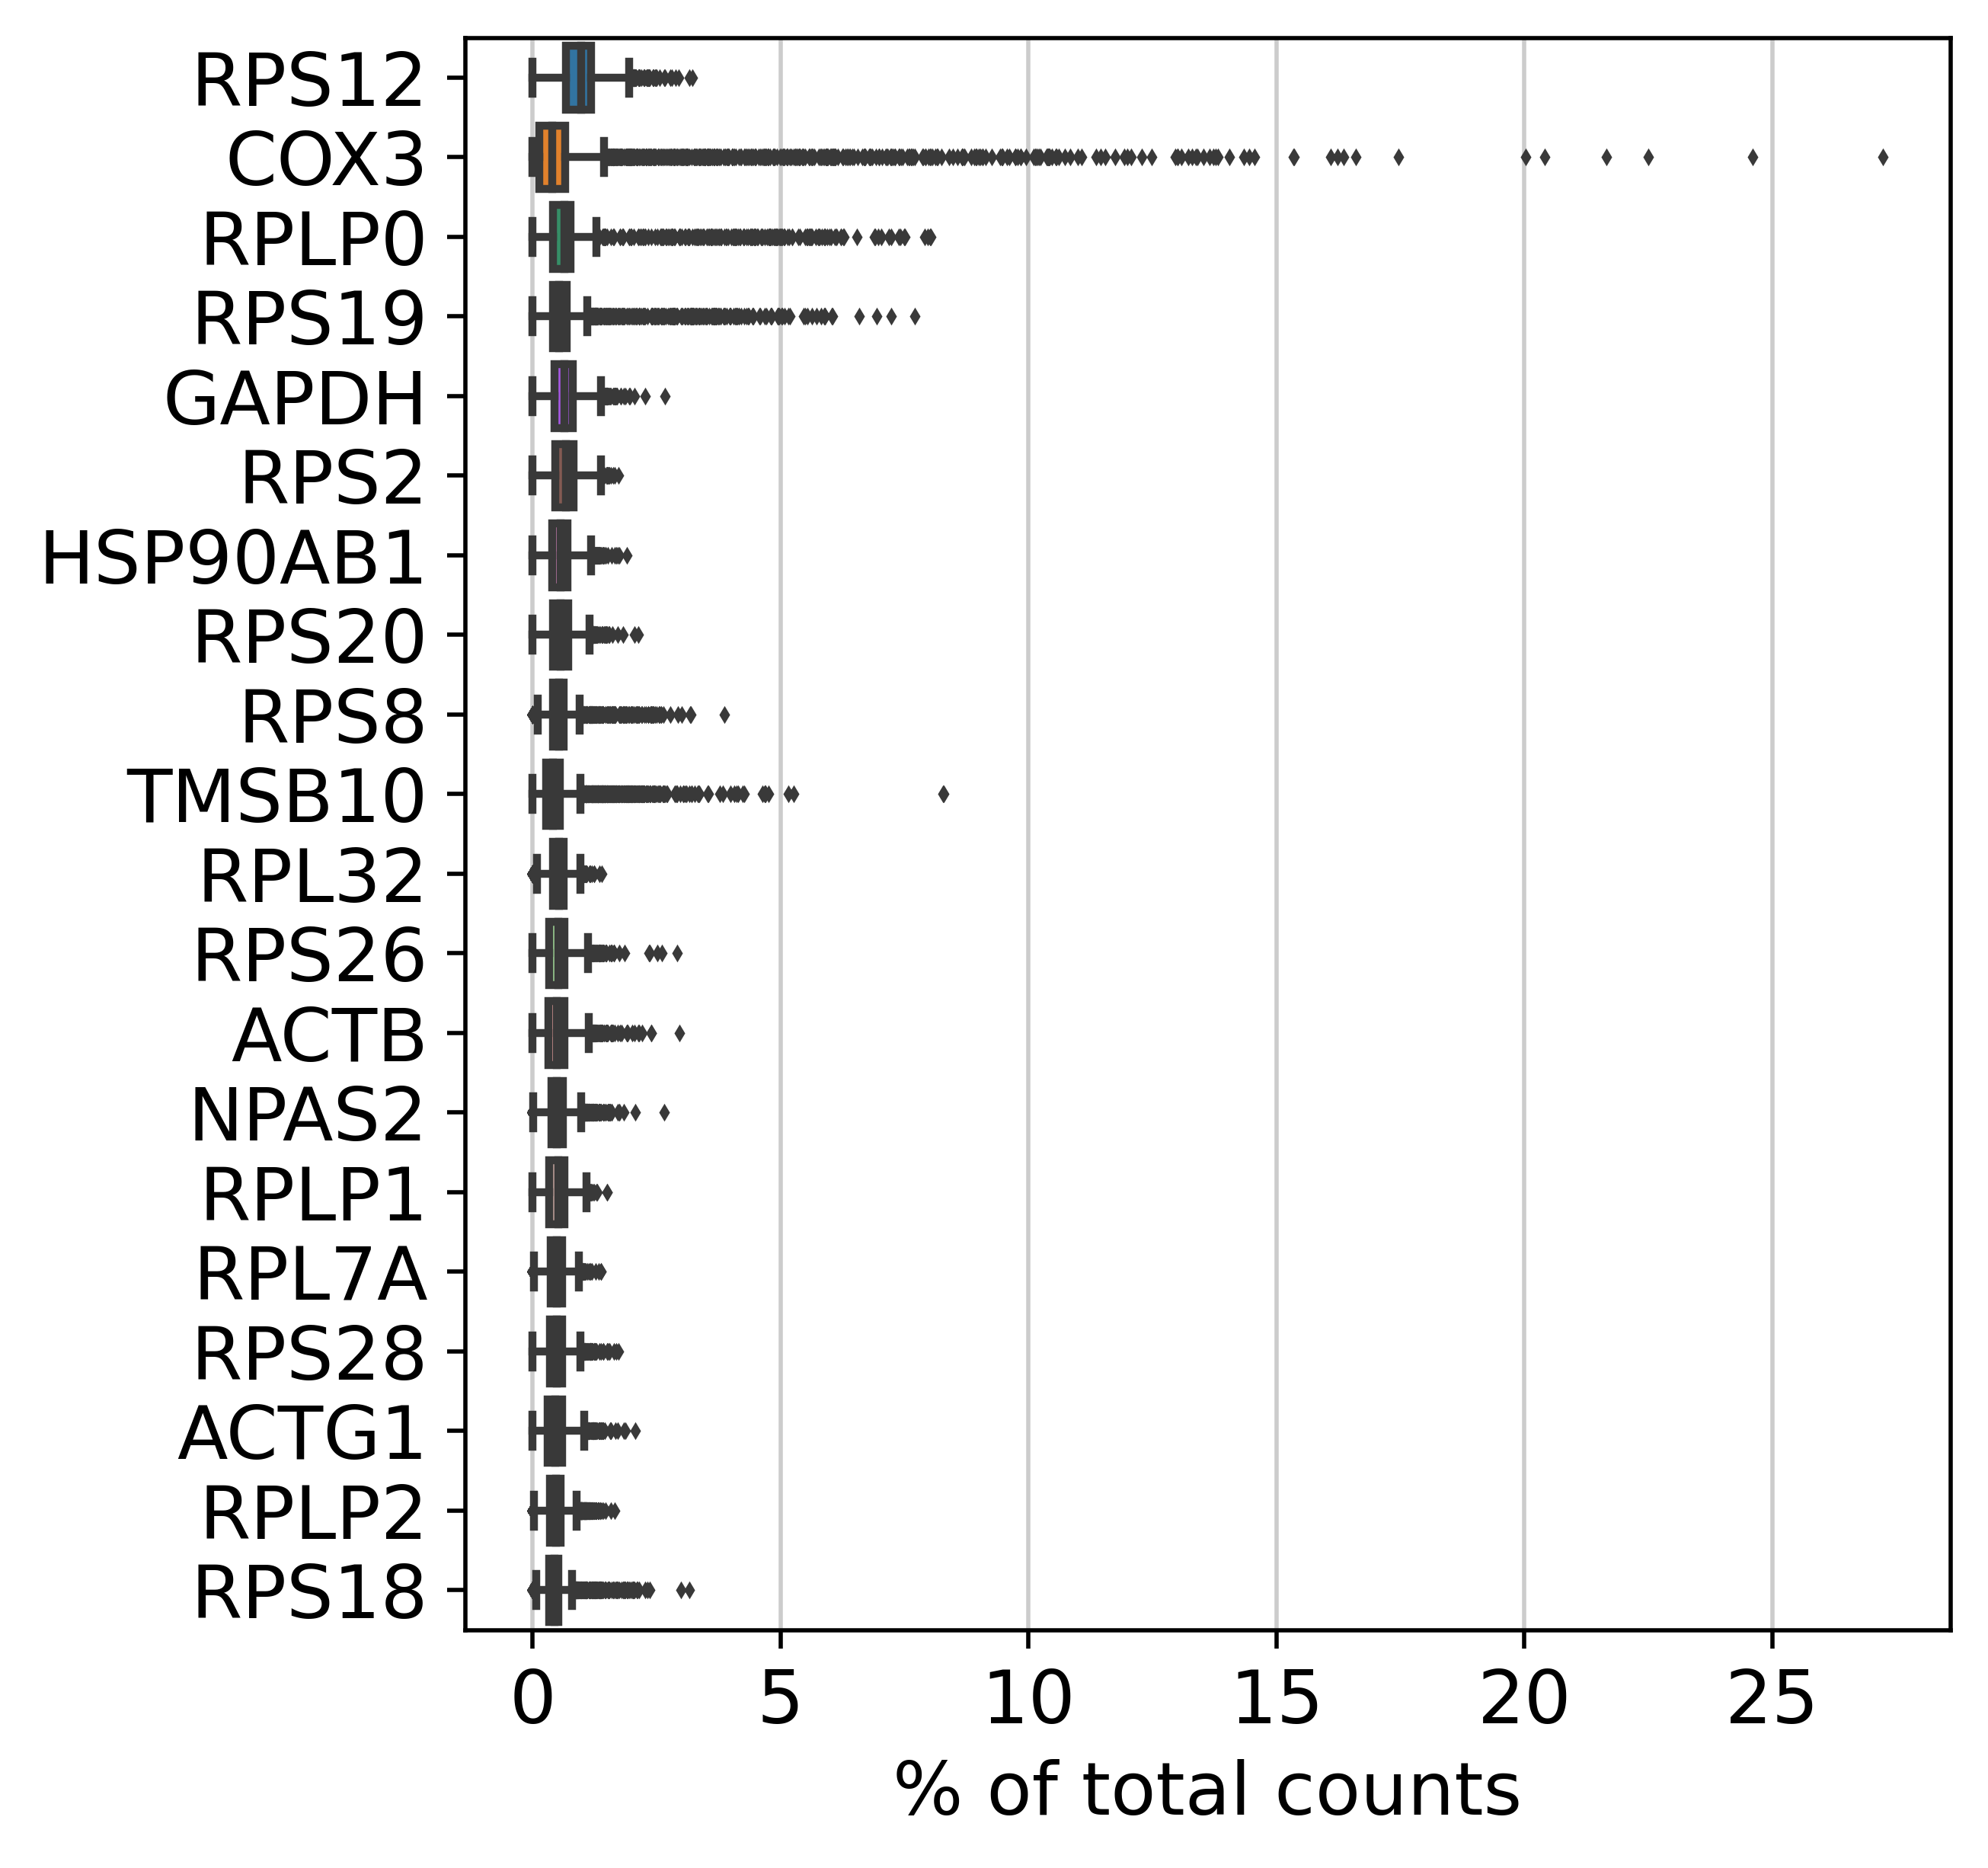

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 5655 genes that are detected in less than 3 cells


In [7]:
#https://genome.ucsc.edu/cgi-bin/hgTables?hgsid=1471262743_7XSVpRXzjvpAACt3yaXhAlmZaVMV
mito = pd.read_csv('Data/mito.txt', sep='\t')
mito.head()

#bin         name chrom strand  txStart  txEnd  cdsStart  cdsEnd  \
0   585  YP_209205.1  chrM      +     3100   4056      3100    4056   
1   585  YP_209206.1  chrM      +     4265   5307      4265    5307   
2   585  YP_209207.1  chrM      +     5686   7231      5686    7231   
3   585  YP_209208.1  chrM      +     7373   8057      7373    8057   
4   585  YP_209209.1  chrM      +     8128   8329      8128    8329   

   exonCount exonStarts exonEnds  score name2 cdsStartStat cdsEndStat  \
0          1      3100,    4056,      0   ND1         cmpl       cmpl   
1          1      4265,    5307,      0   ND2         cmpl       cmpl   
2          1      5686,    7231,      0  COX1         cmpl       cmpl   
3          1      7373,    8057,      0  COX2         cmpl       cmpl   
4          1      8128,    8329,      0  ATP8         cmpl       cmpl   

  exonFrames  
0         0,  
1         0,  
2         0,  
3         0,  
4         0,

In [8]:
adata.var['mt'] = [True if i in mito.name2.values else False for i in adata.var_names] # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

<Axes: ylabel='pct_counts_mt'>

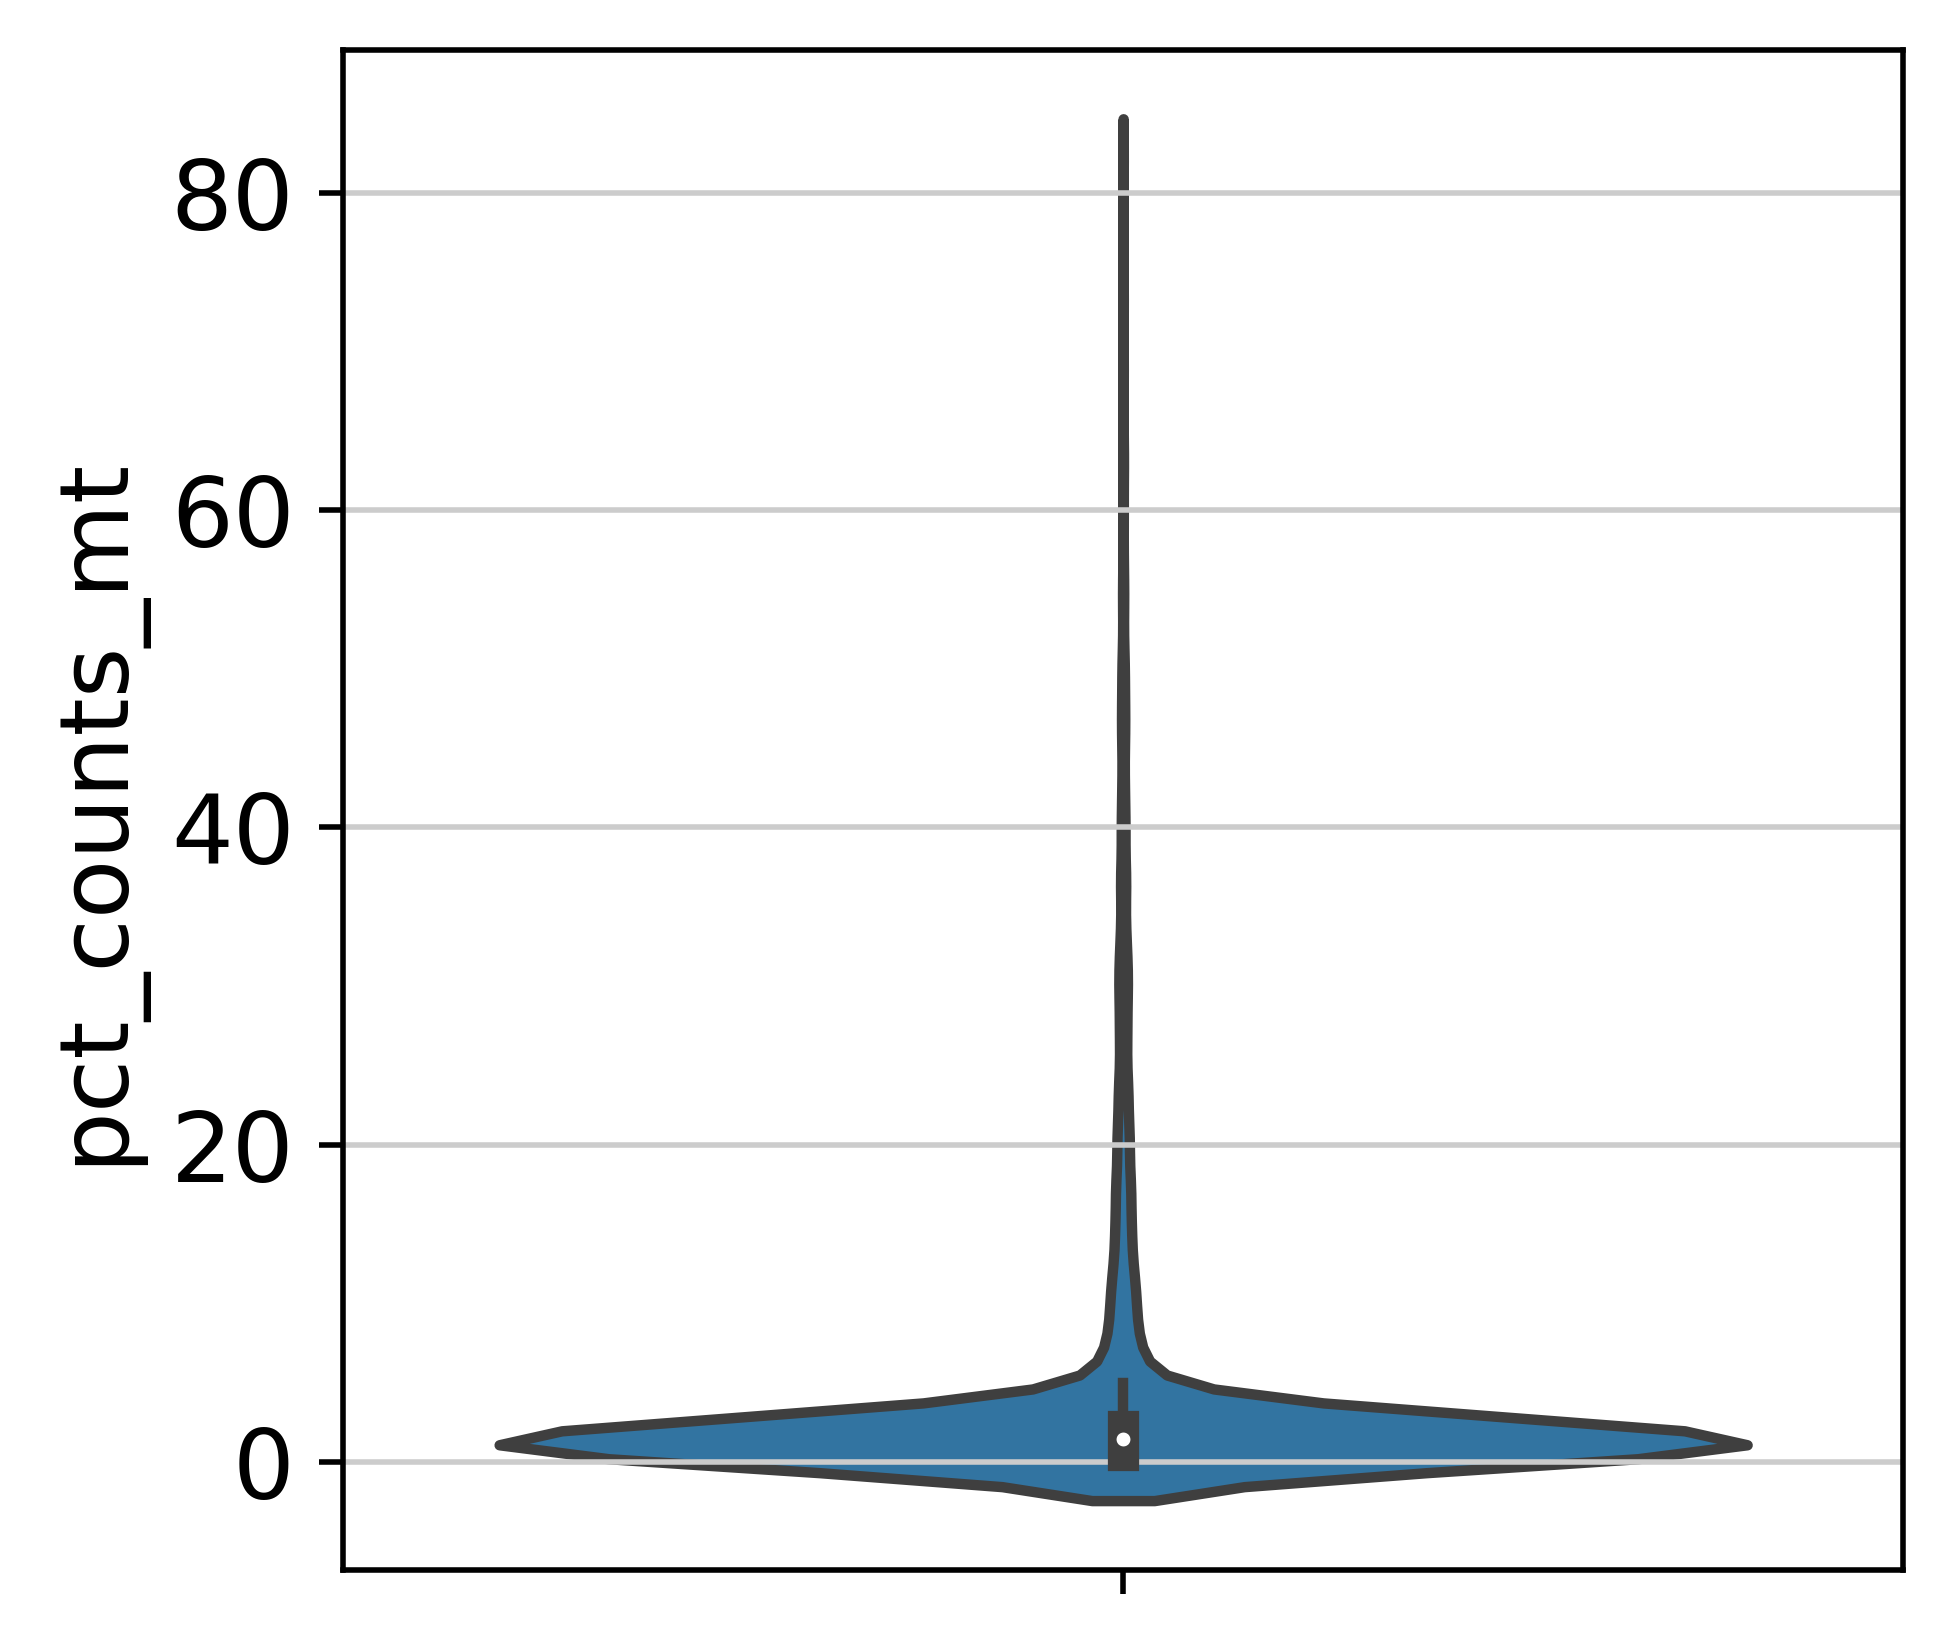

In [9]:
sns.violinplot(y = adata.obs["pct_counts_mt"])

<Axes: ylabel='n_genes_by_counts'>

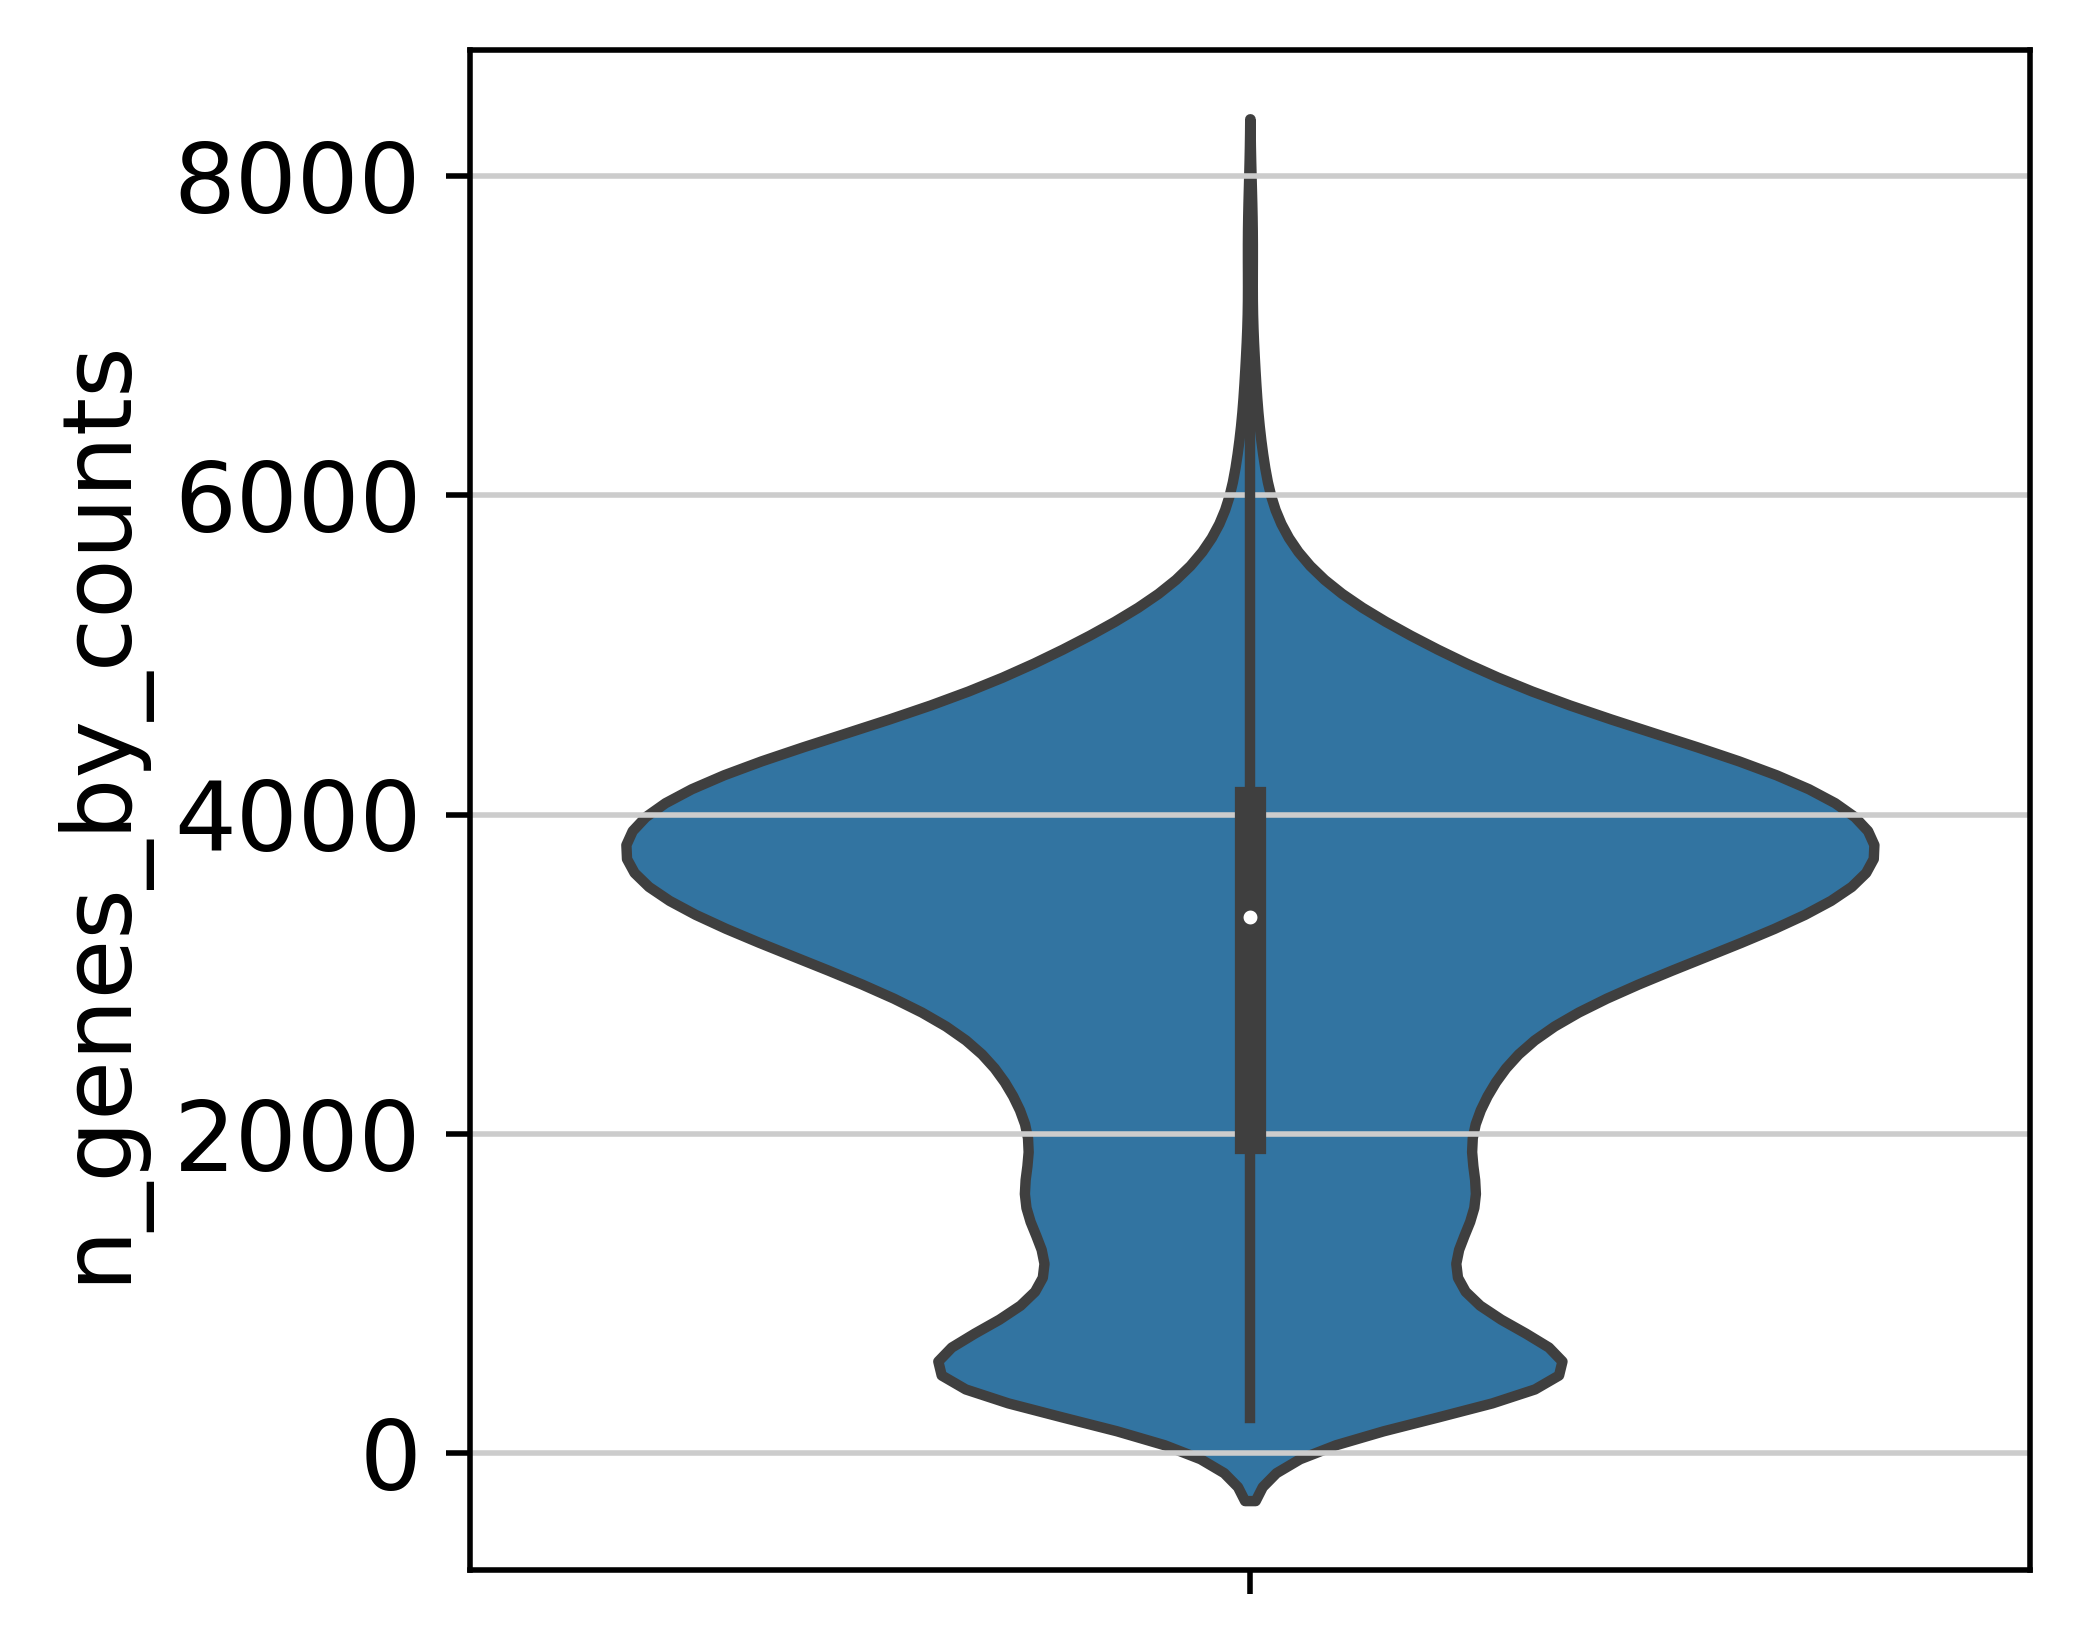

In [10]:
sns.violinplot(y = adata.obs.n_genes_by_counts)

<Axes: ylabel='total_counts'>

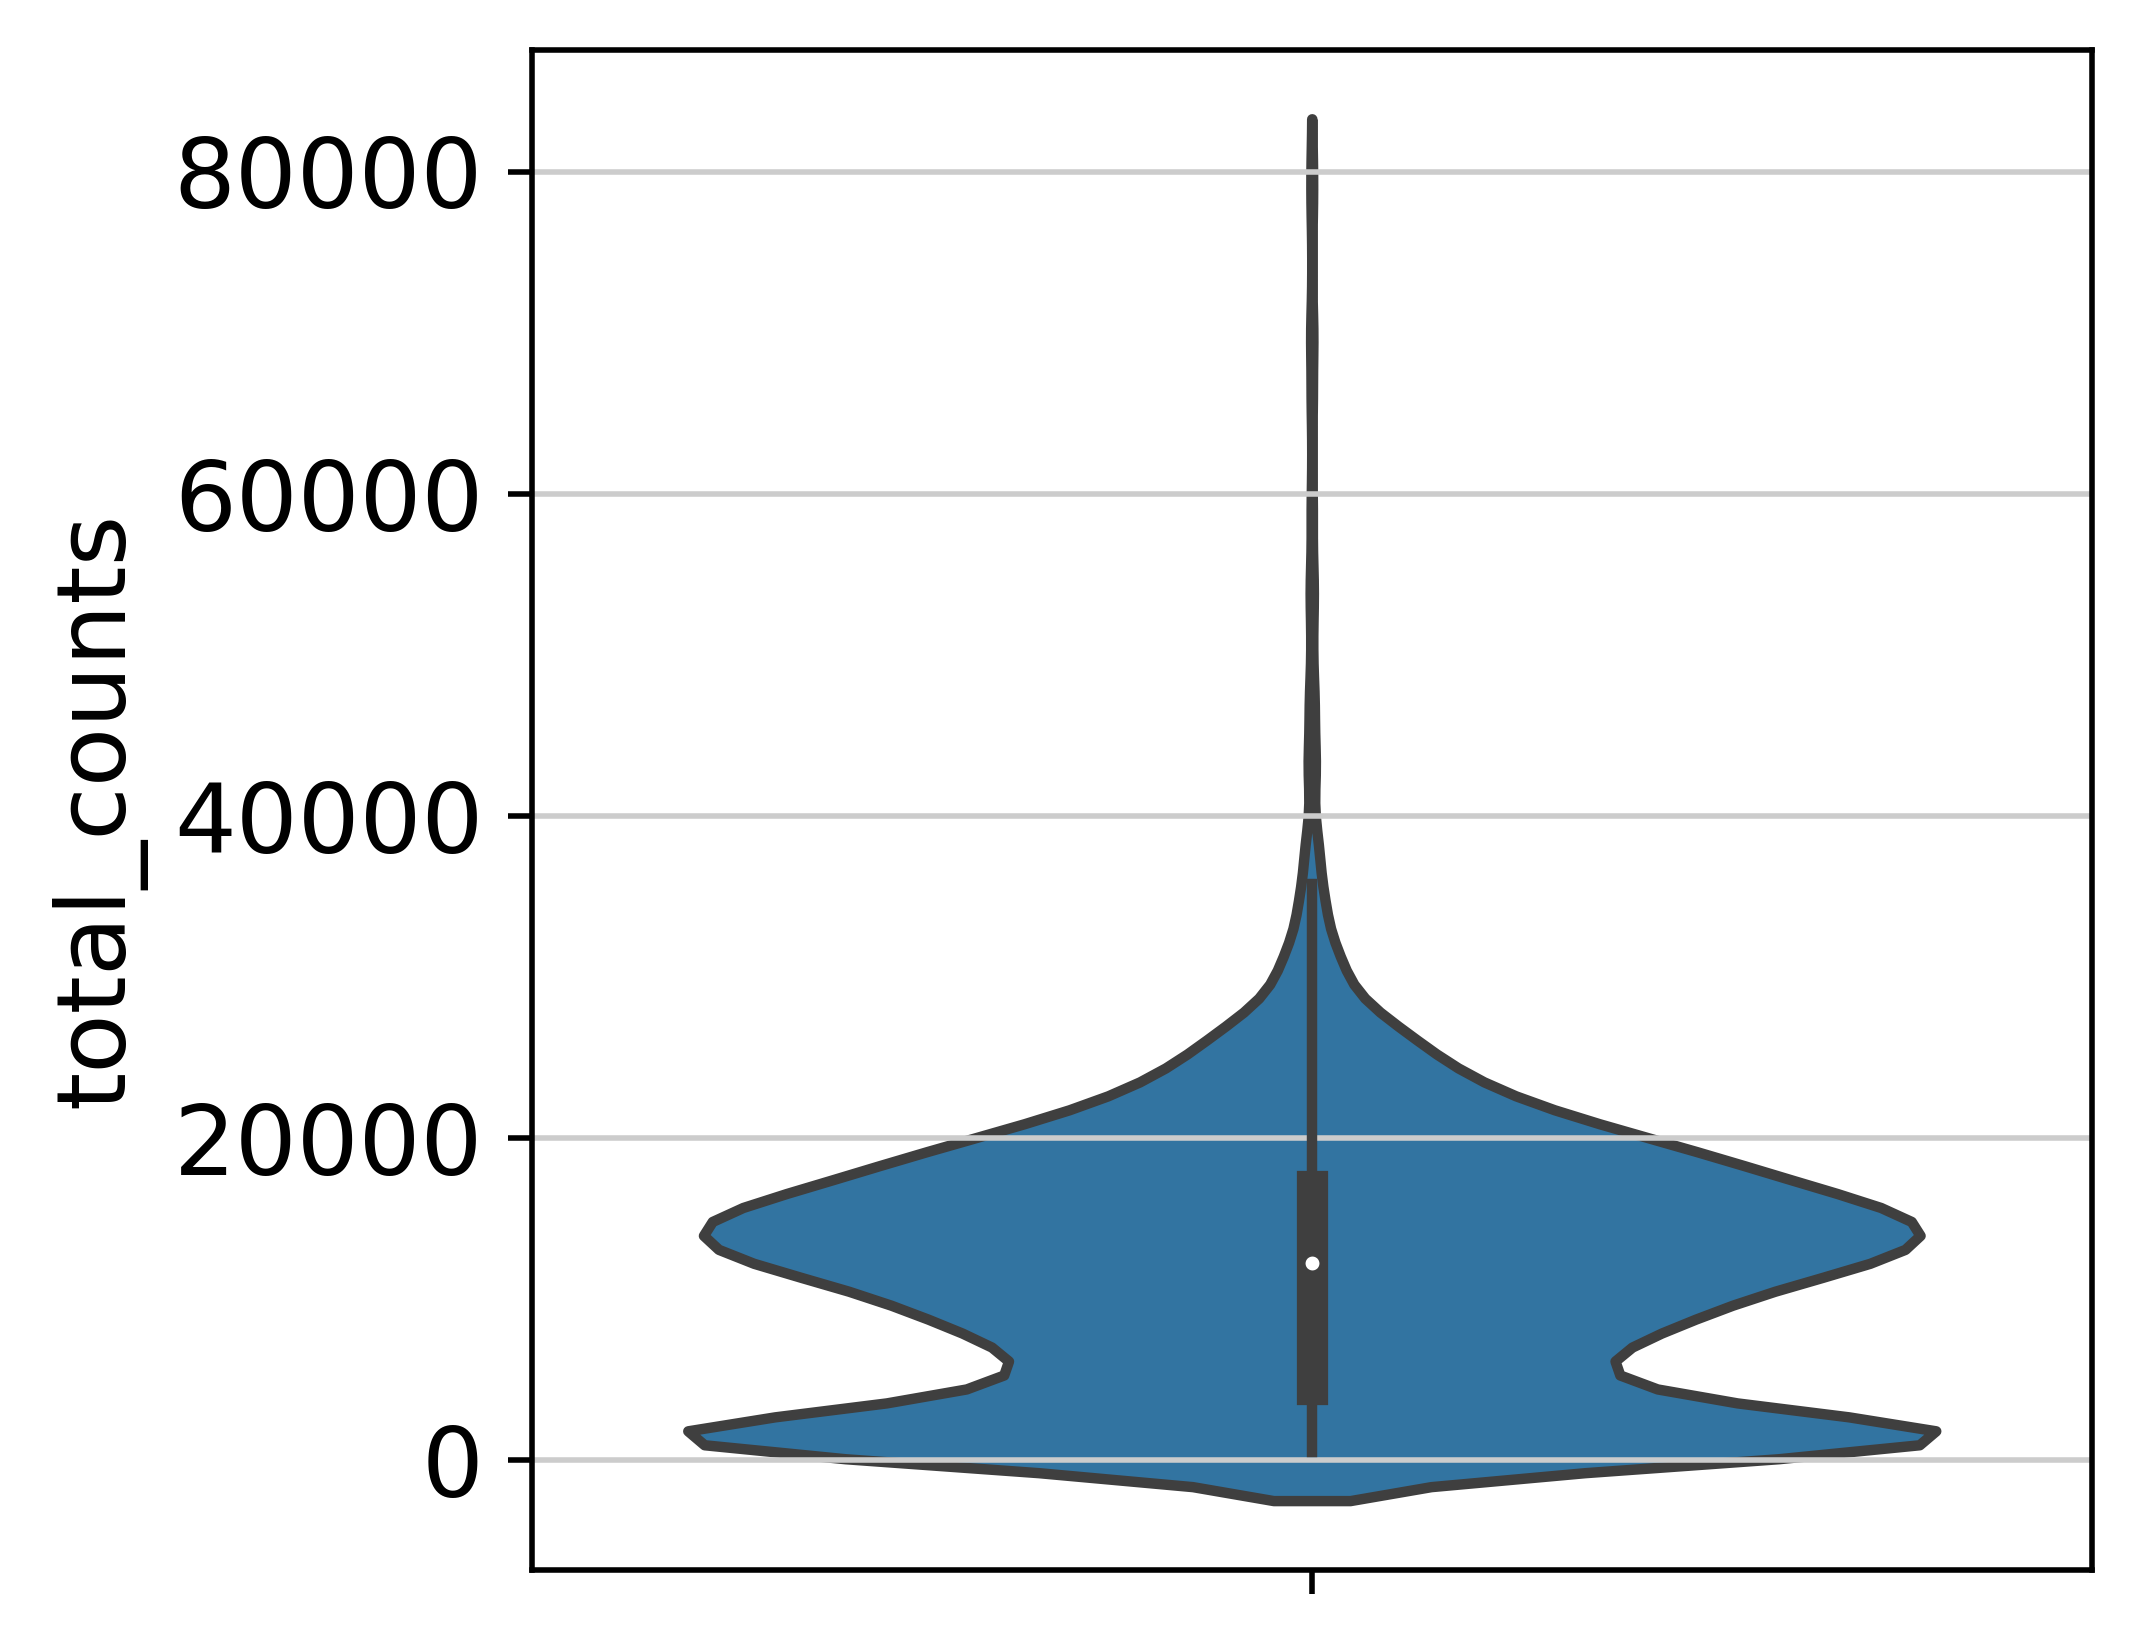

In [11]:
sns.violinplot(y = adata.obs.total_counts)

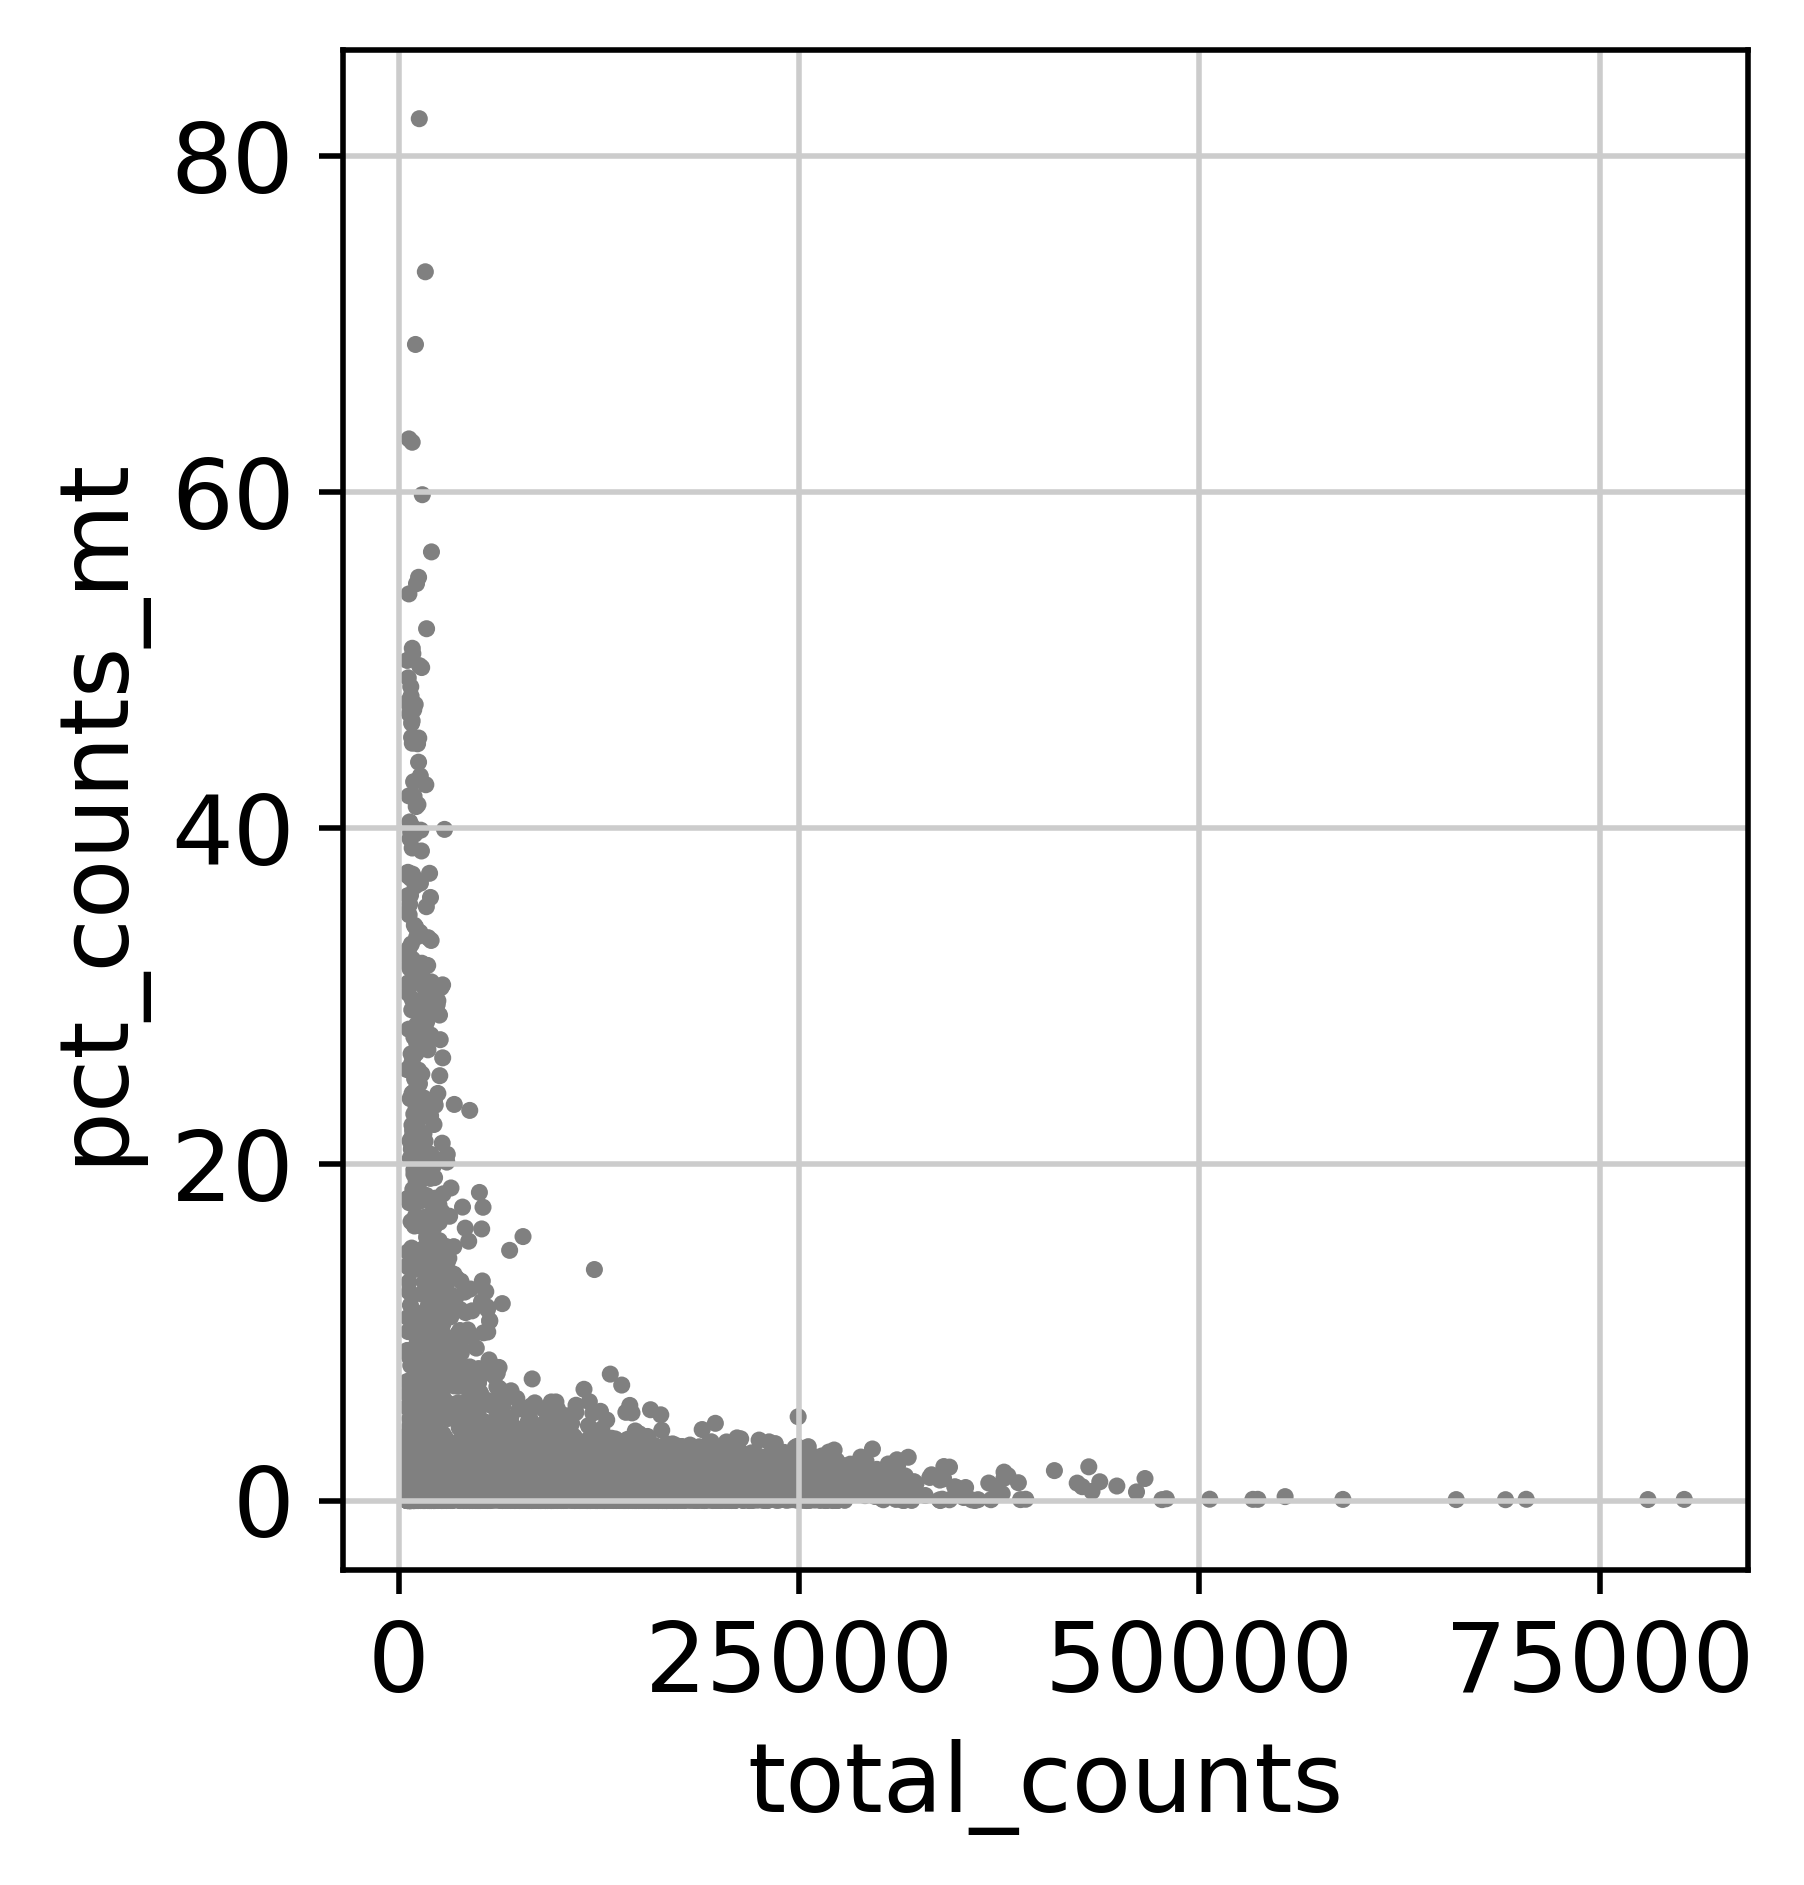

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')


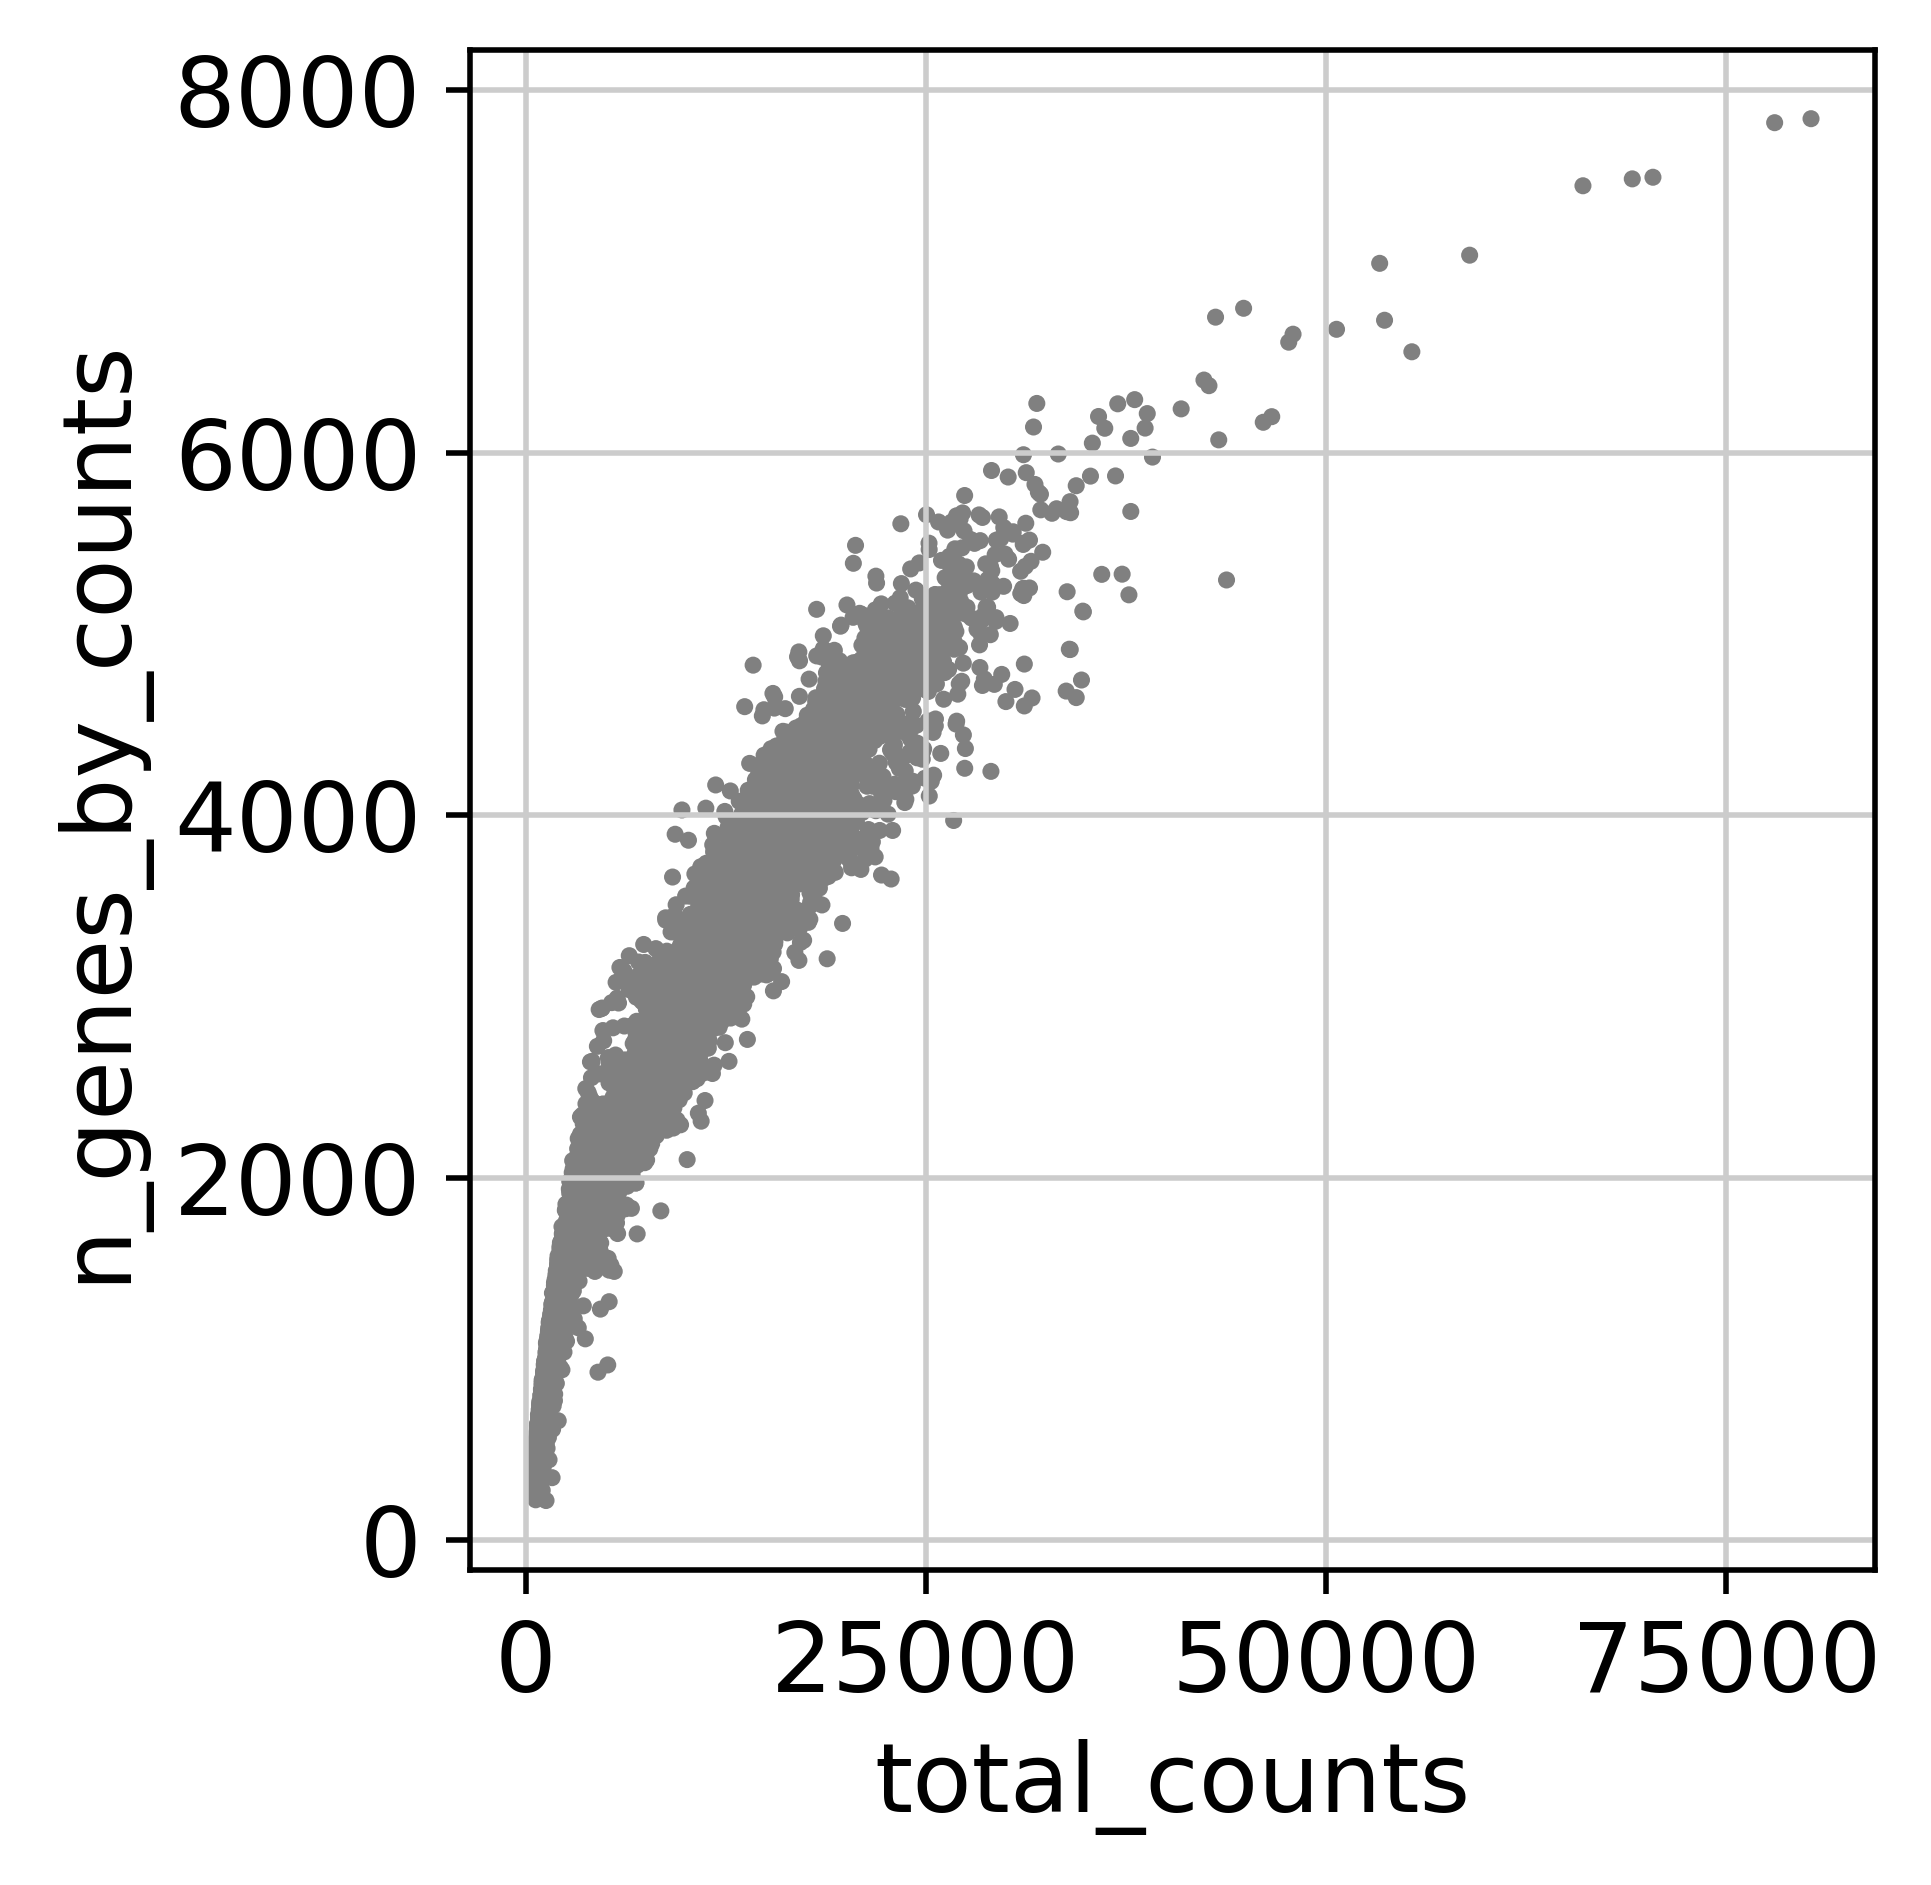

In [13]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')


In [14]:
adata = adata[adata.obs.total_counts<30000]
adata = adata[adata.obs.total_counts>5000]
adata = adata[adata.obs.pct_counts_mt<15]
adata = adata[adata.obs.n_genes_by_counts>2000]

In [15]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/usr/local/lib/python3.9/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [16]:
adata.raw = adata

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


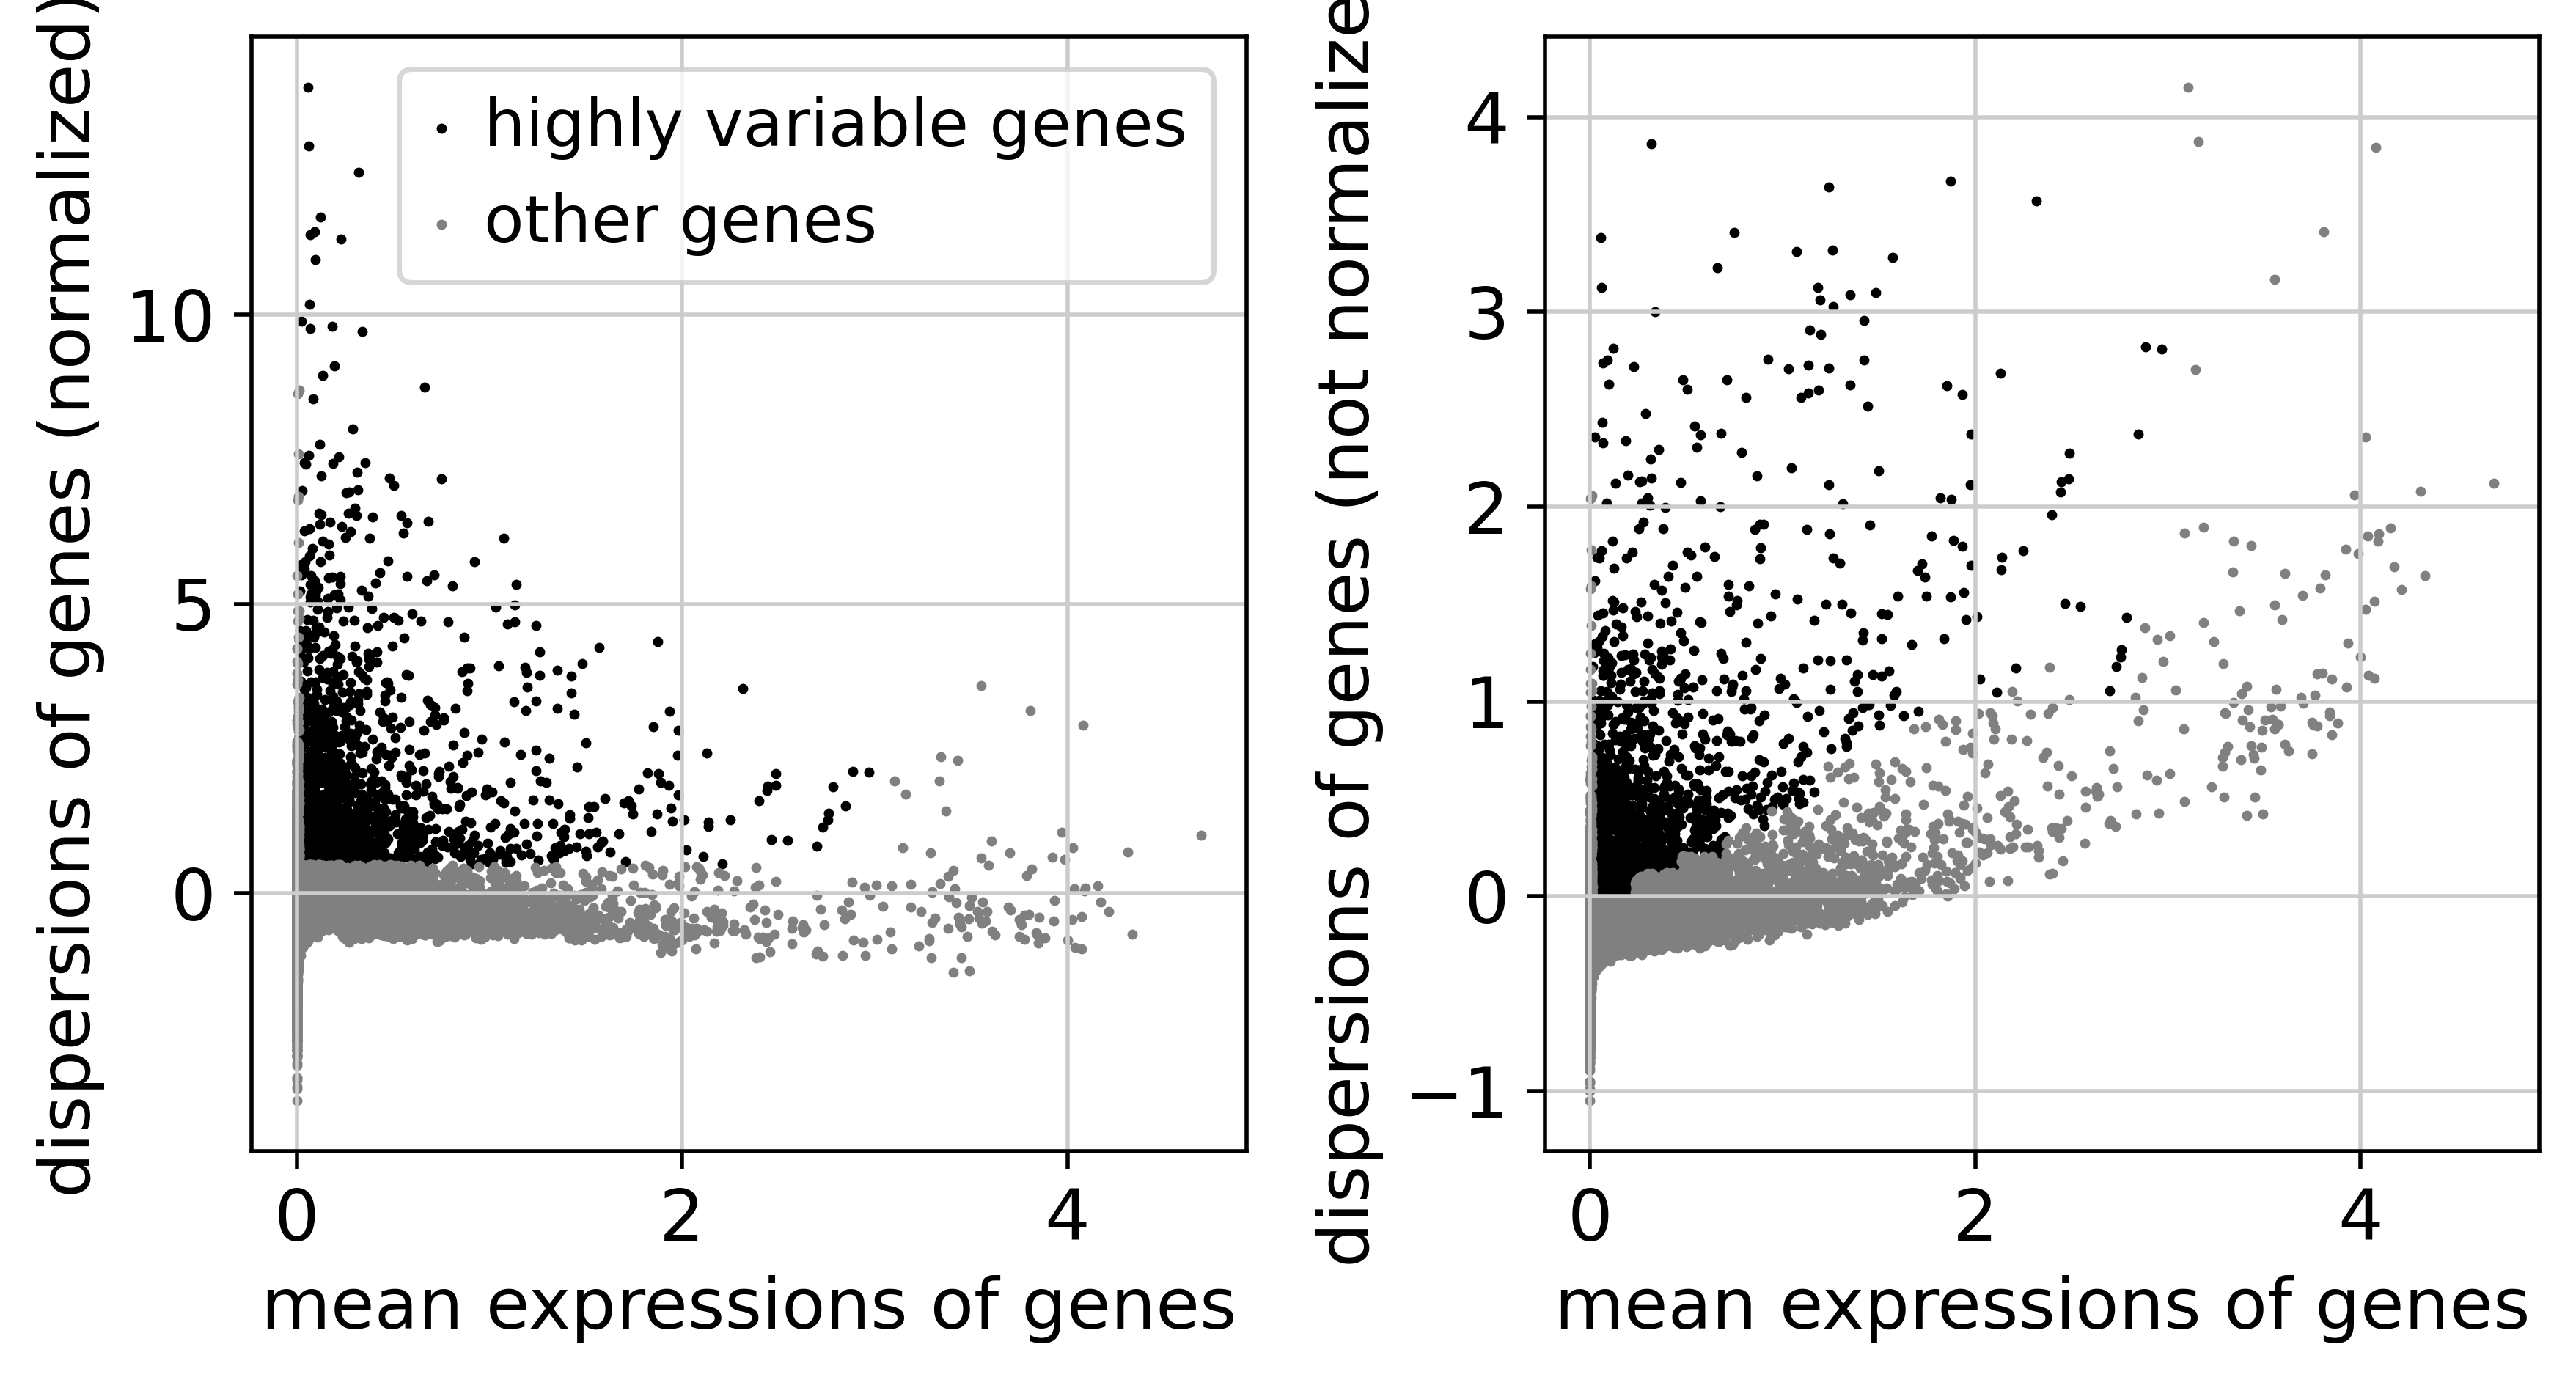

In [17]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [18]:
sc.pp.scale(adata, max_value=10)

# Plotting

In [19]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


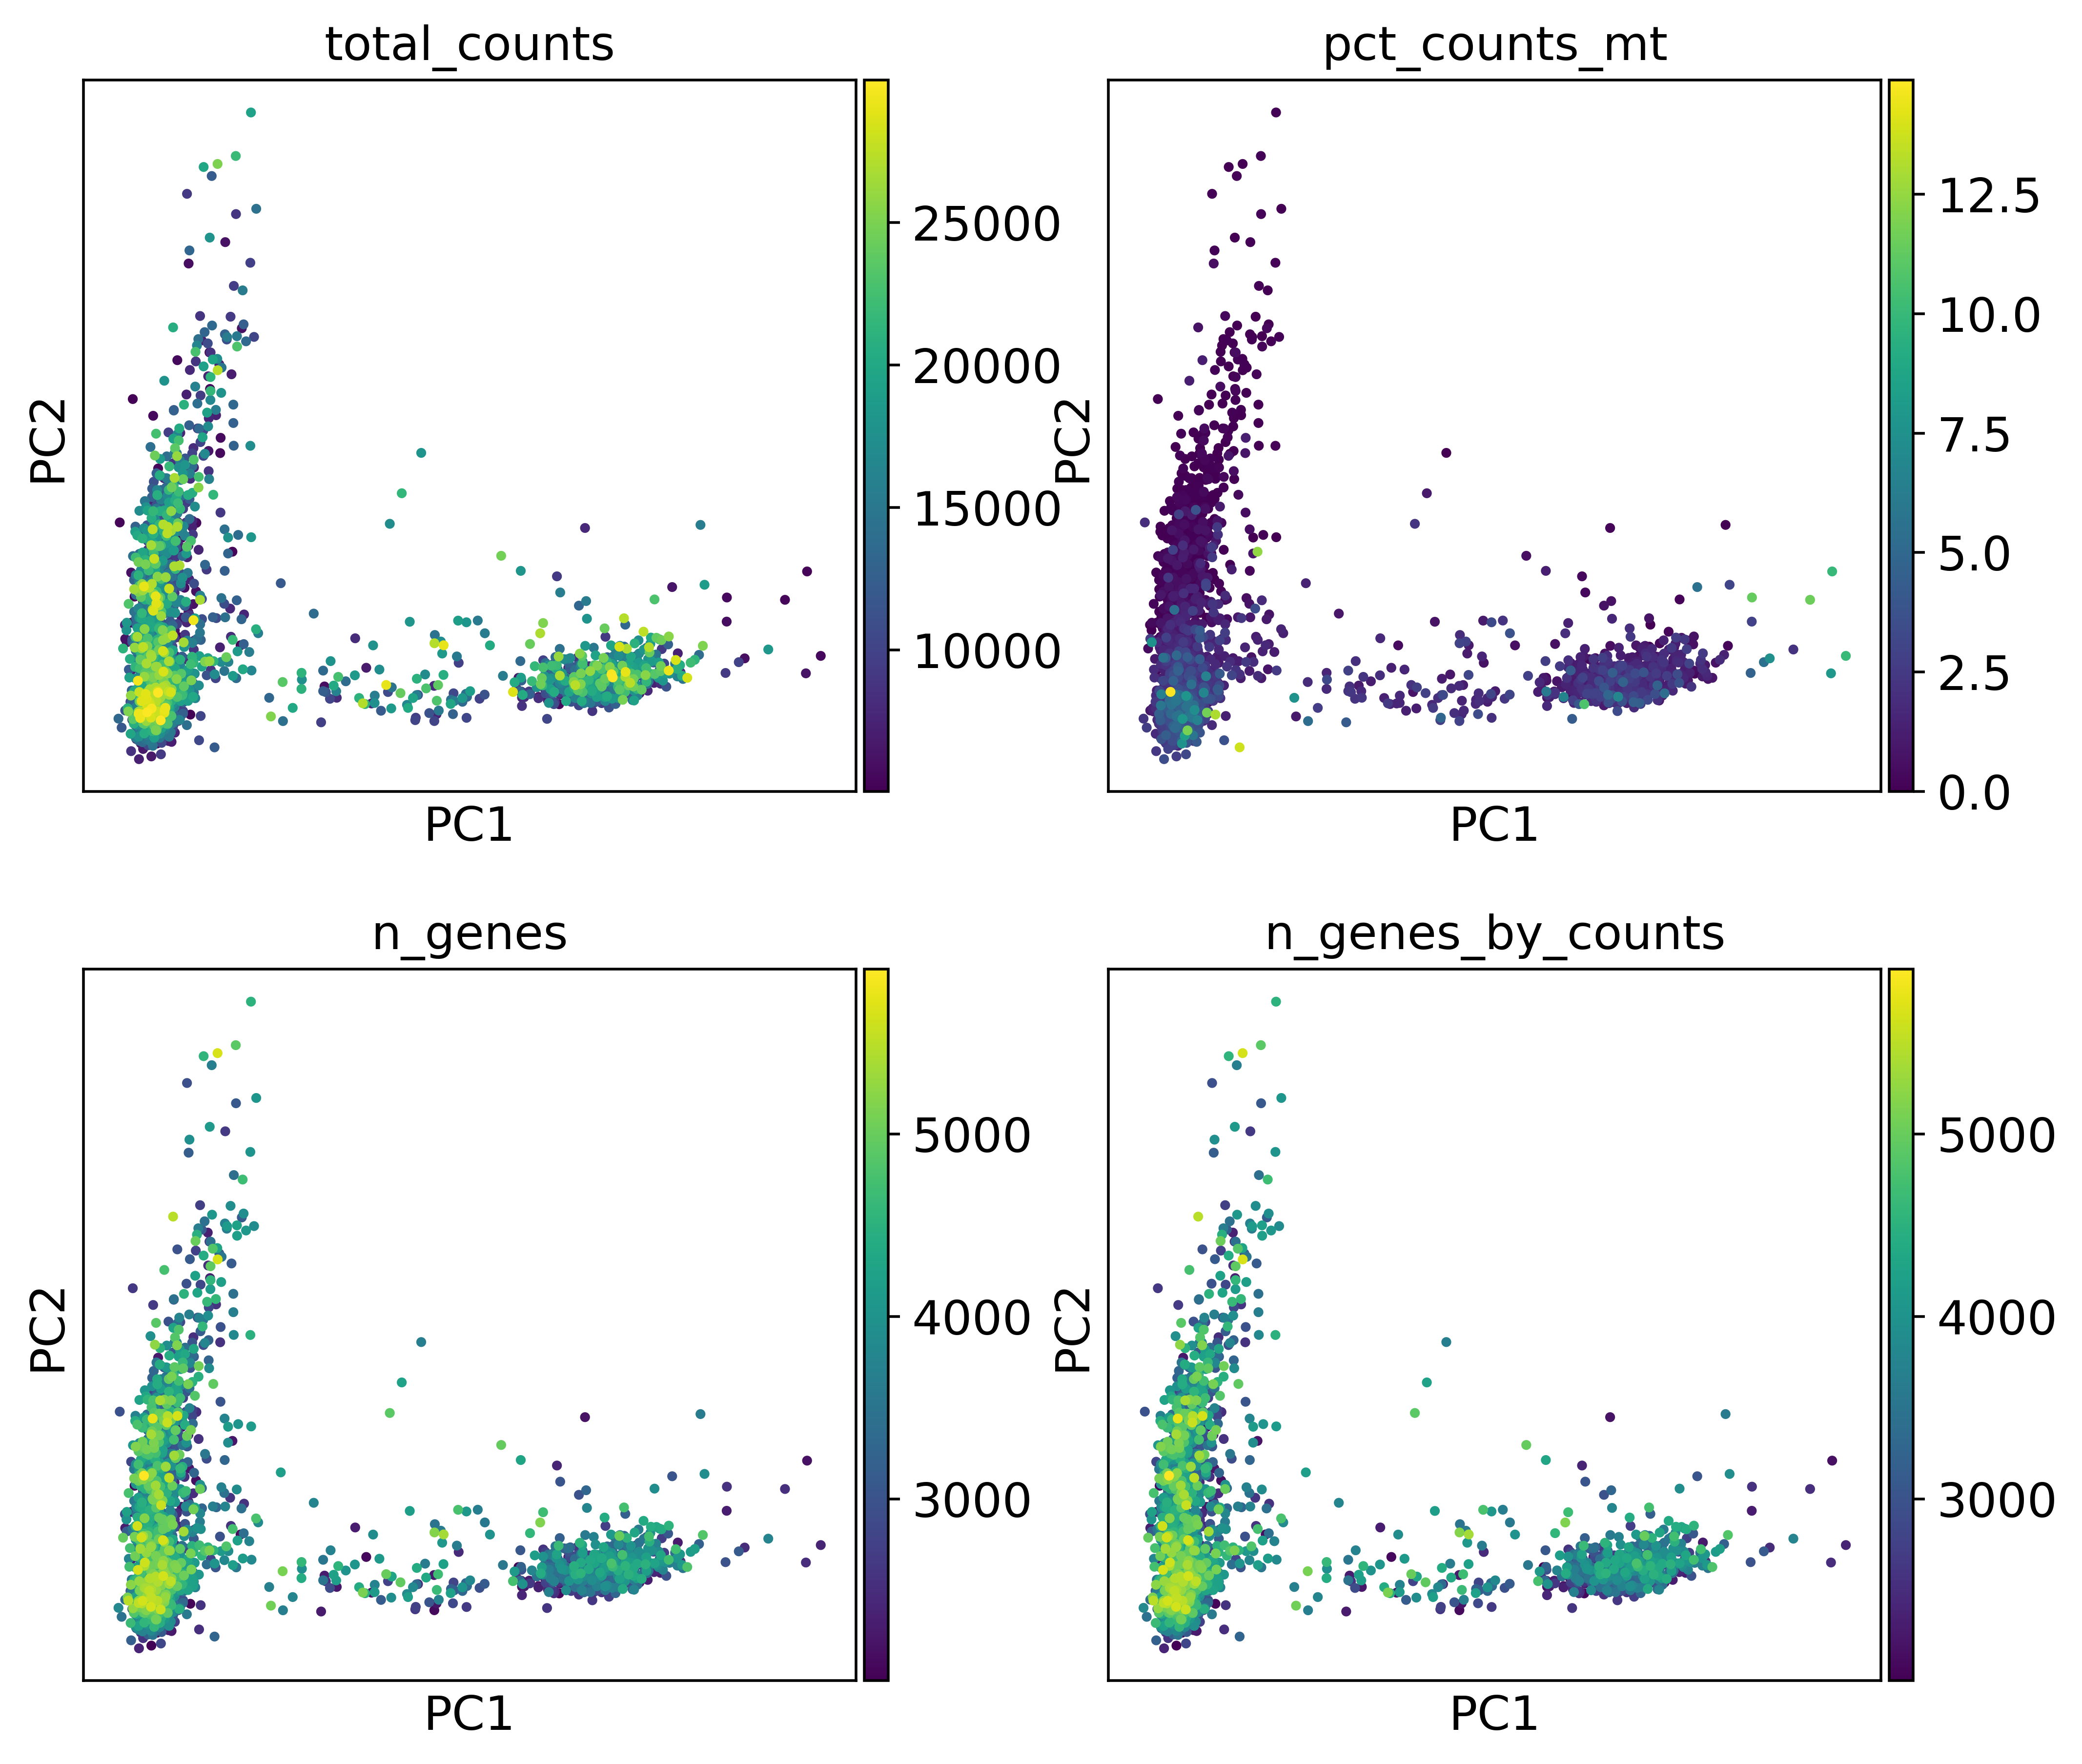

In [20]:
sc.pl.pca(adata, color=["total_counts", "pct_counts_mt", "n_genes", "n_genes_by_counts"], ncols=2)

In [21]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.3)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


# Annotation

In [22]:
sc.tl.leiden(adata, resolution=0.75)

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [23]:
my_markers = {
    "EPI":['POU5F1', 'NANOG', 'TDGF1', 'PRDM14', 'TDGF1', 'NODAL'],#, 'APOE', 'KLF2', 'SALL4', 'HAND1', 'CGA', 'PAX6'],
    "PE":['SOX17', 'GATA4', 'PDGFRA', 'HNF4A', 'FOXA2'],
    "TE":['GATA3', 'GATA2', 'DAB2', 'GRHL1', 'OVOL1']
    }

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: EPI, PE, TE


/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


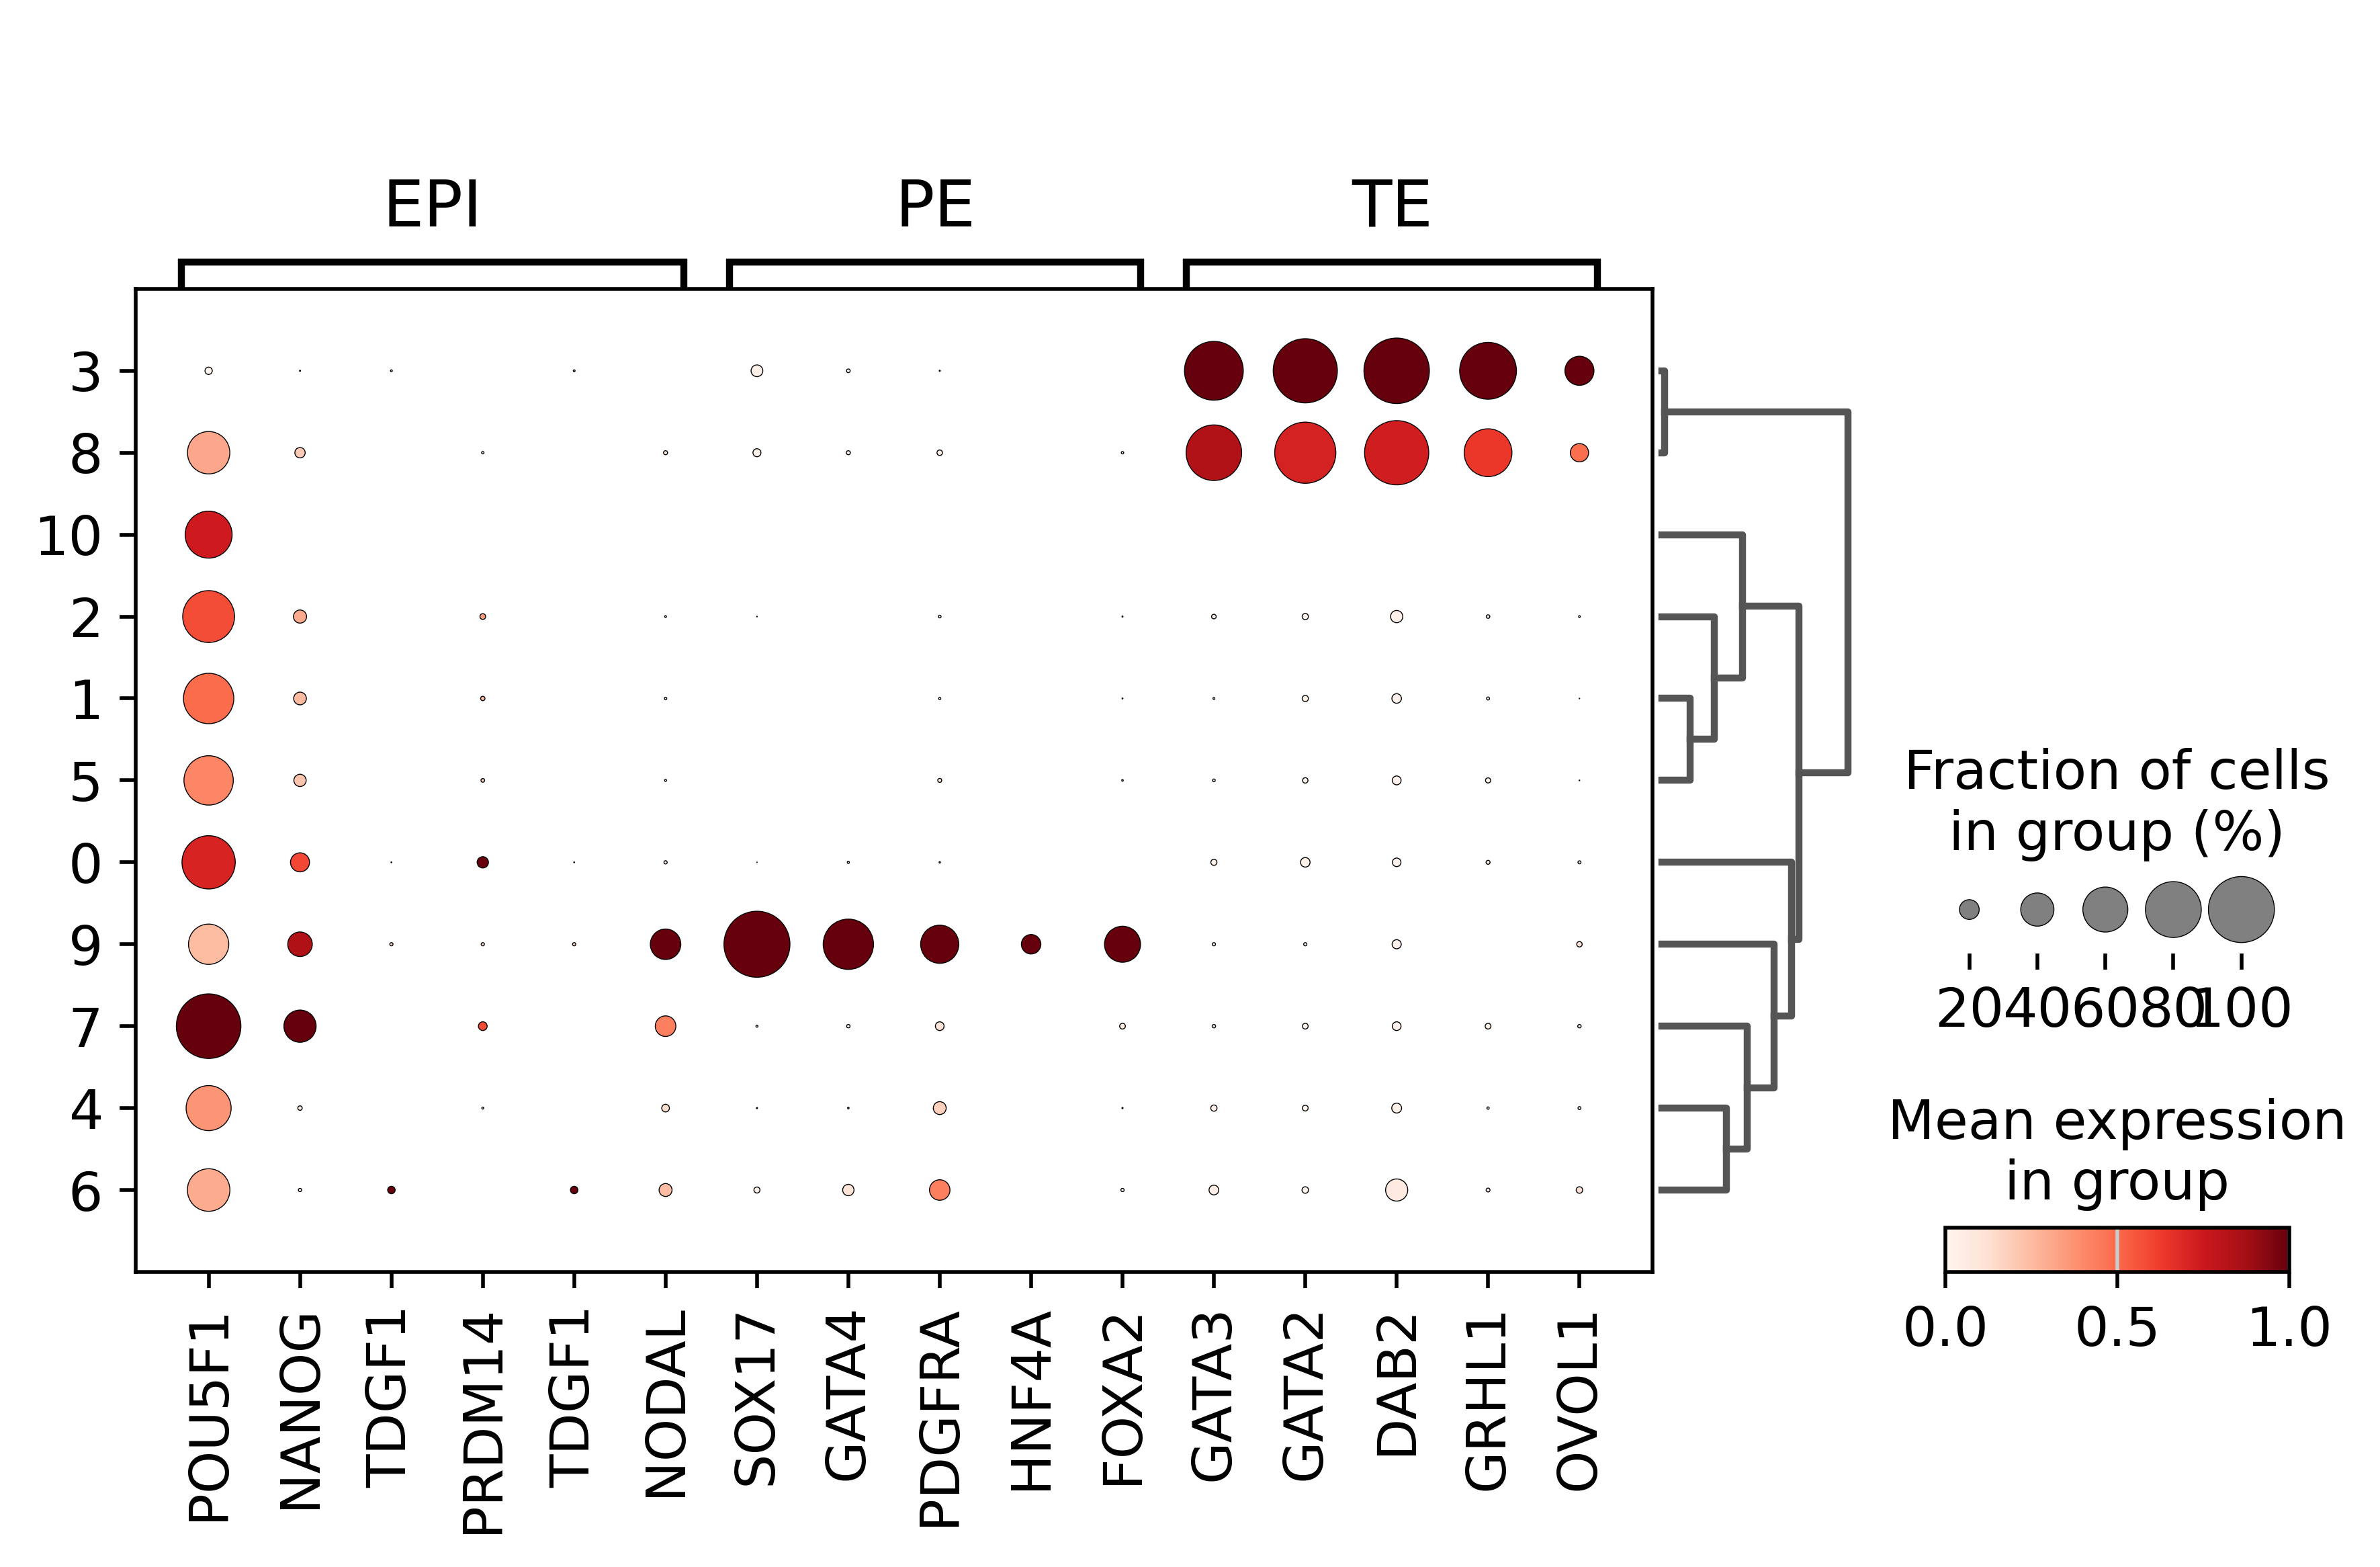

In [24]:
sc.tl.dendrogram(adata, groupby="leiden")
sc.pl.dotplot(adata, my_markers, 'leiden', dendrogram=True, use_raw=True, standard_scale='var')

In [25]:
lines_dict1 = {'0':'EPI_1', '1':'EPI_2', 
              '2':'EPI_3', '3':'TE', 
              '4':'EPI_to_HYPO', '5':'EPI_3', 
              '6':'EPI_to_HYPO', '7':'EPI_to_HYPO', 
              '8':'TE', '9':'HYPO',
              '10':'EPI_3'}

lines_dict2 = {'0':'EPI', '1':'EPI', 
              '2':'EPI', '3':'TE', 
              '4':'EPI', '5':'EPI', 
              '6':'EPI', '7':'EPI', 
              '8':'TE', '9':'HYPO',
              '10':'EPI'}

/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


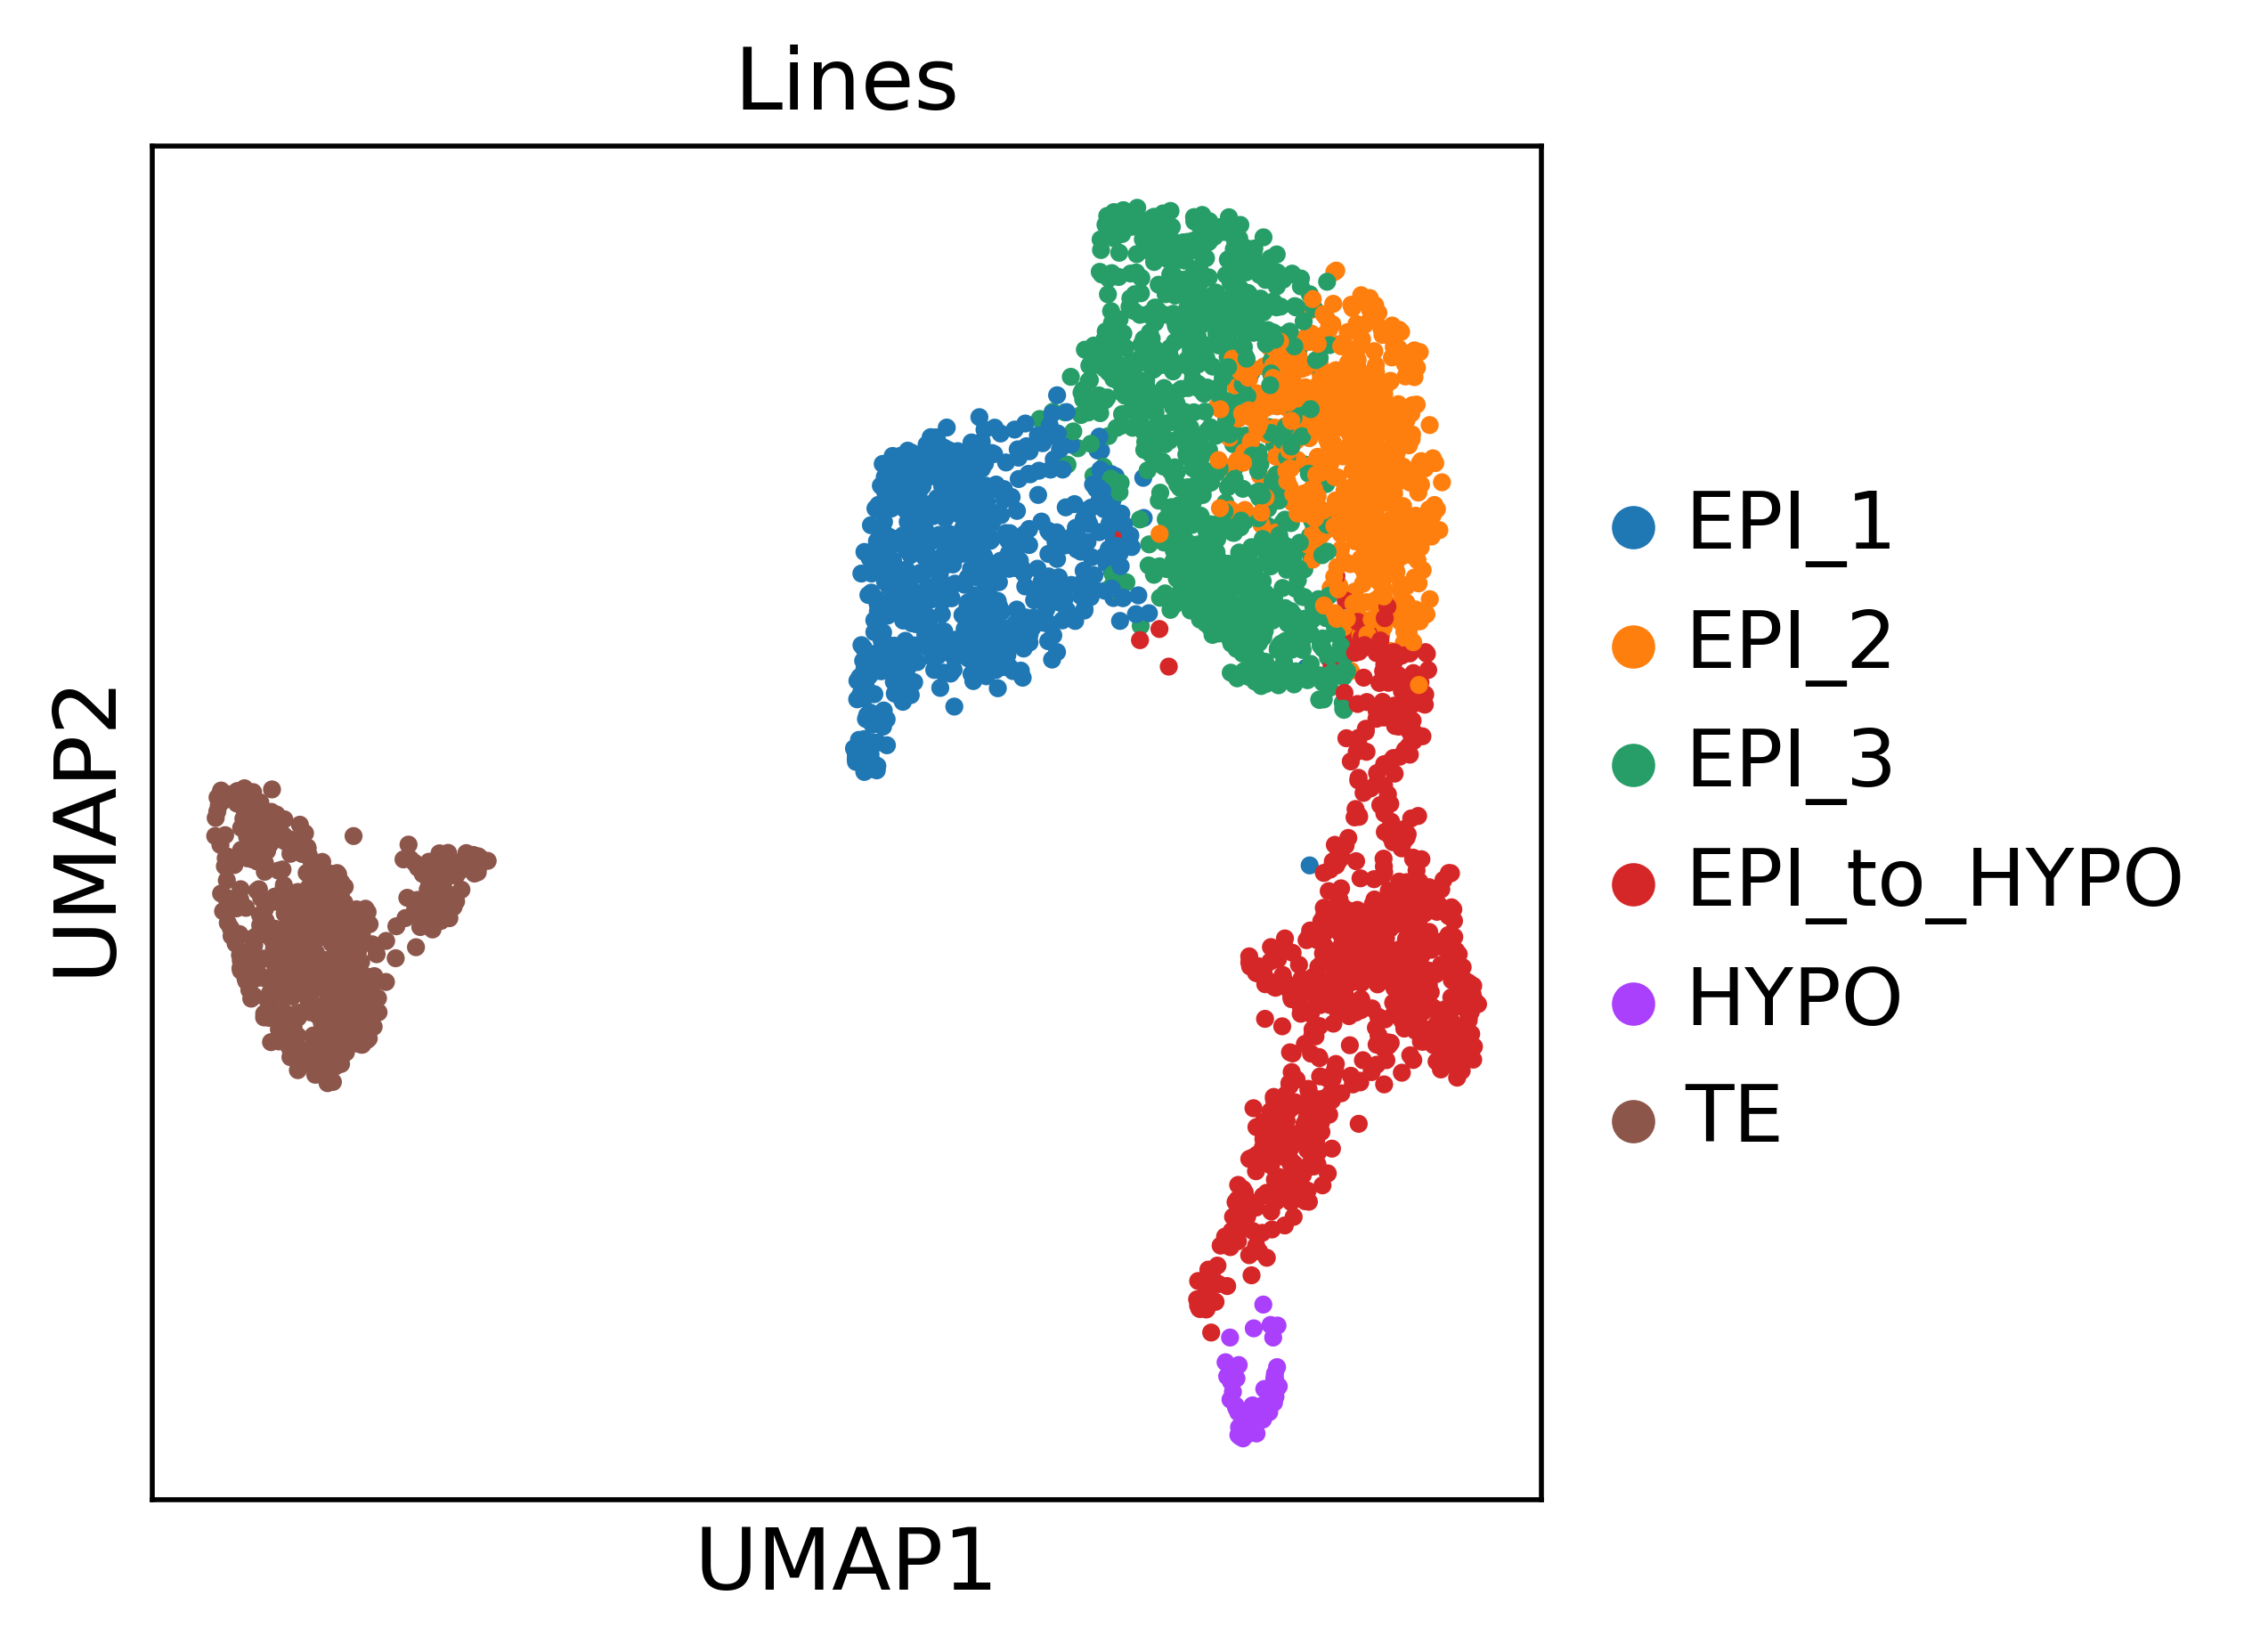

In [26]:
adata.obs['Lines'] = [lines_dict1[i] for i in adata.obs.leiden]
adata.obs['Lines2'] = [lines_dict2[i] for i in adata.obs.leiden]
sc.pl.umap(adata, color='Lines')

# Violin plots

In [27]:
Tight_junction= {
    'Tight': [ 'CLDN4', 'TJP2', 'TJP1', 'OCLN']
}

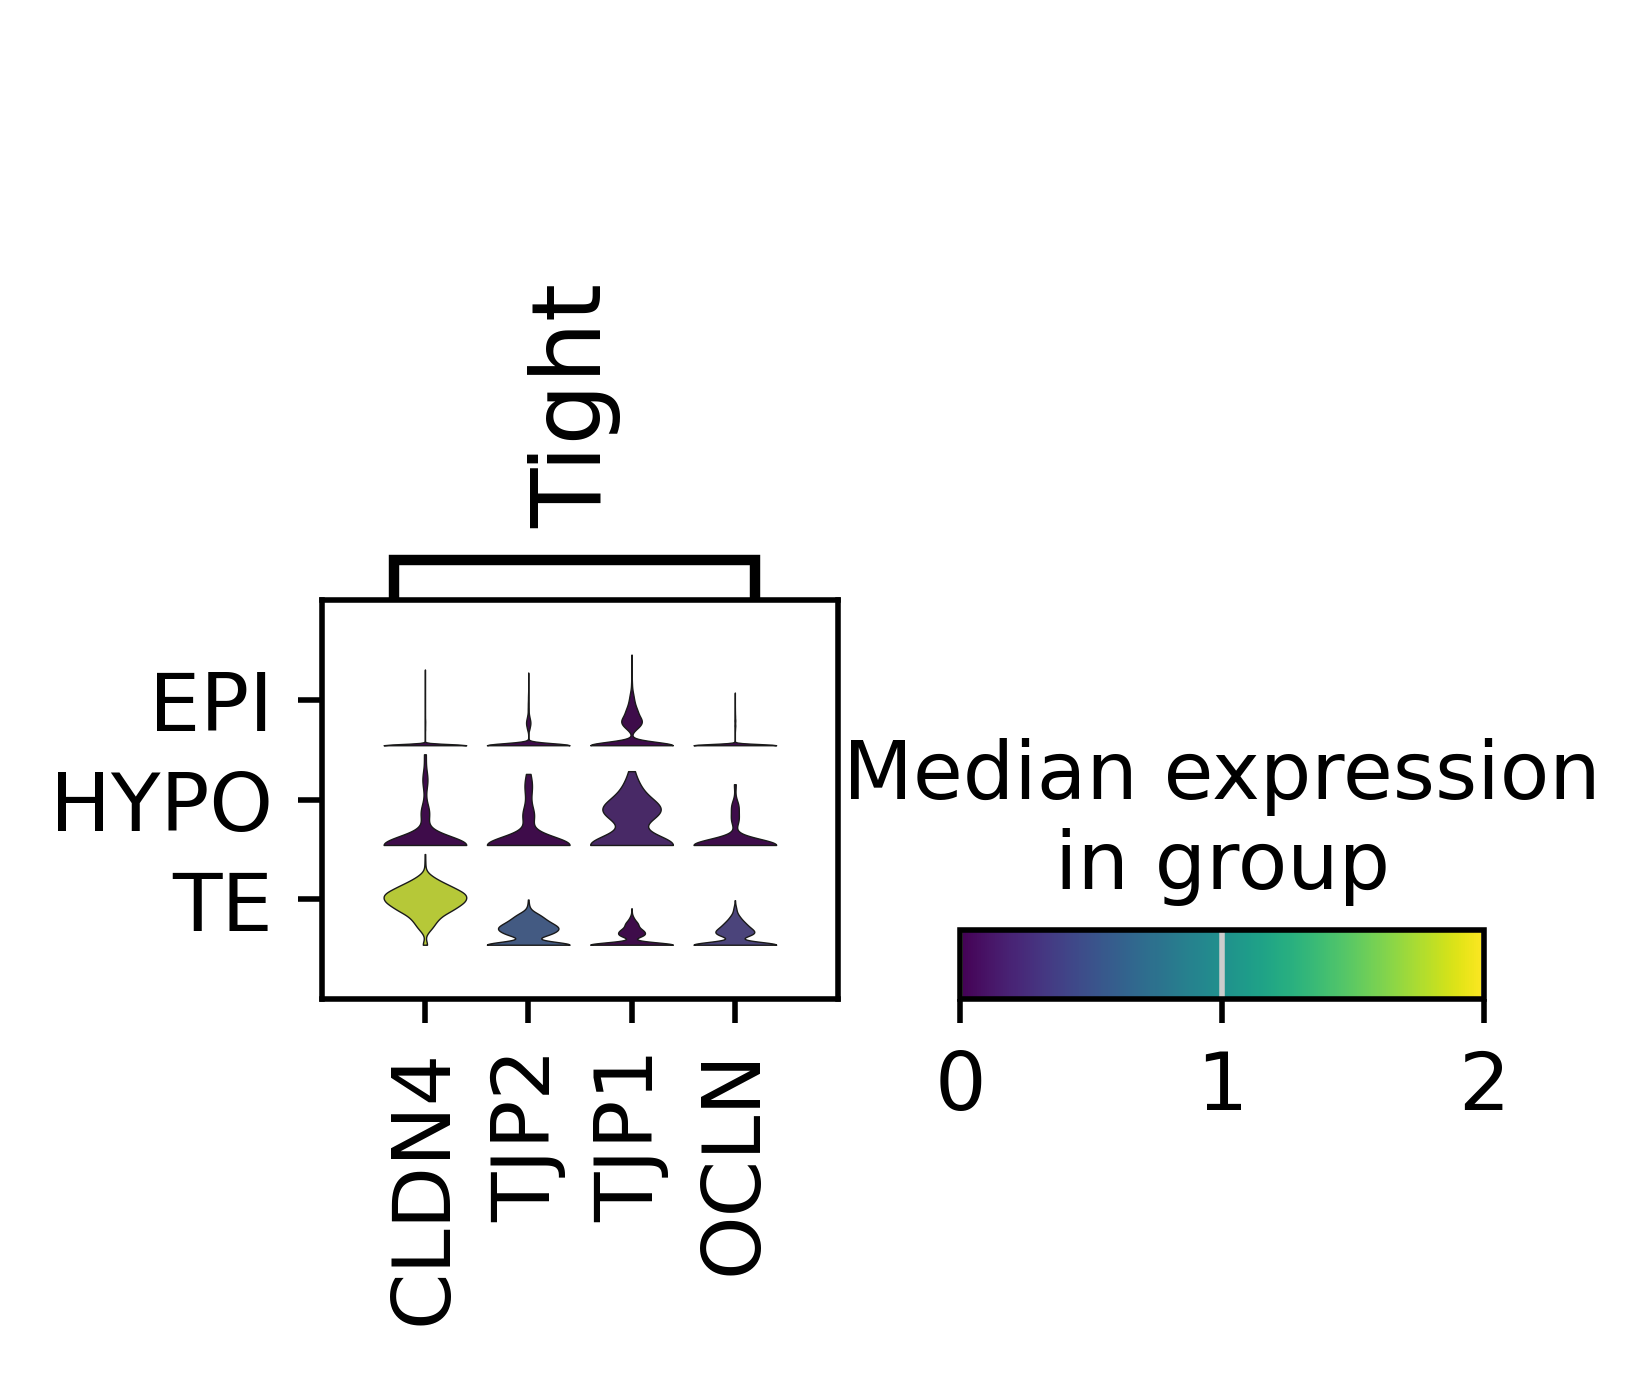

In [28]:
sc.pl.stacked_violin(adata, Tight_junction, groupby="Lines2", swap_axes=False, dendrogram=False, cmap='viridis', vmin=0, vmax=2, show=False)
plt.savefig('Figures/2H_Tight.pdf', bbox_inches="tight")

In [29]:
Caherin = {
    'Cadherin': [ 'CDH1', 'CDH2', 'CDH11']
}

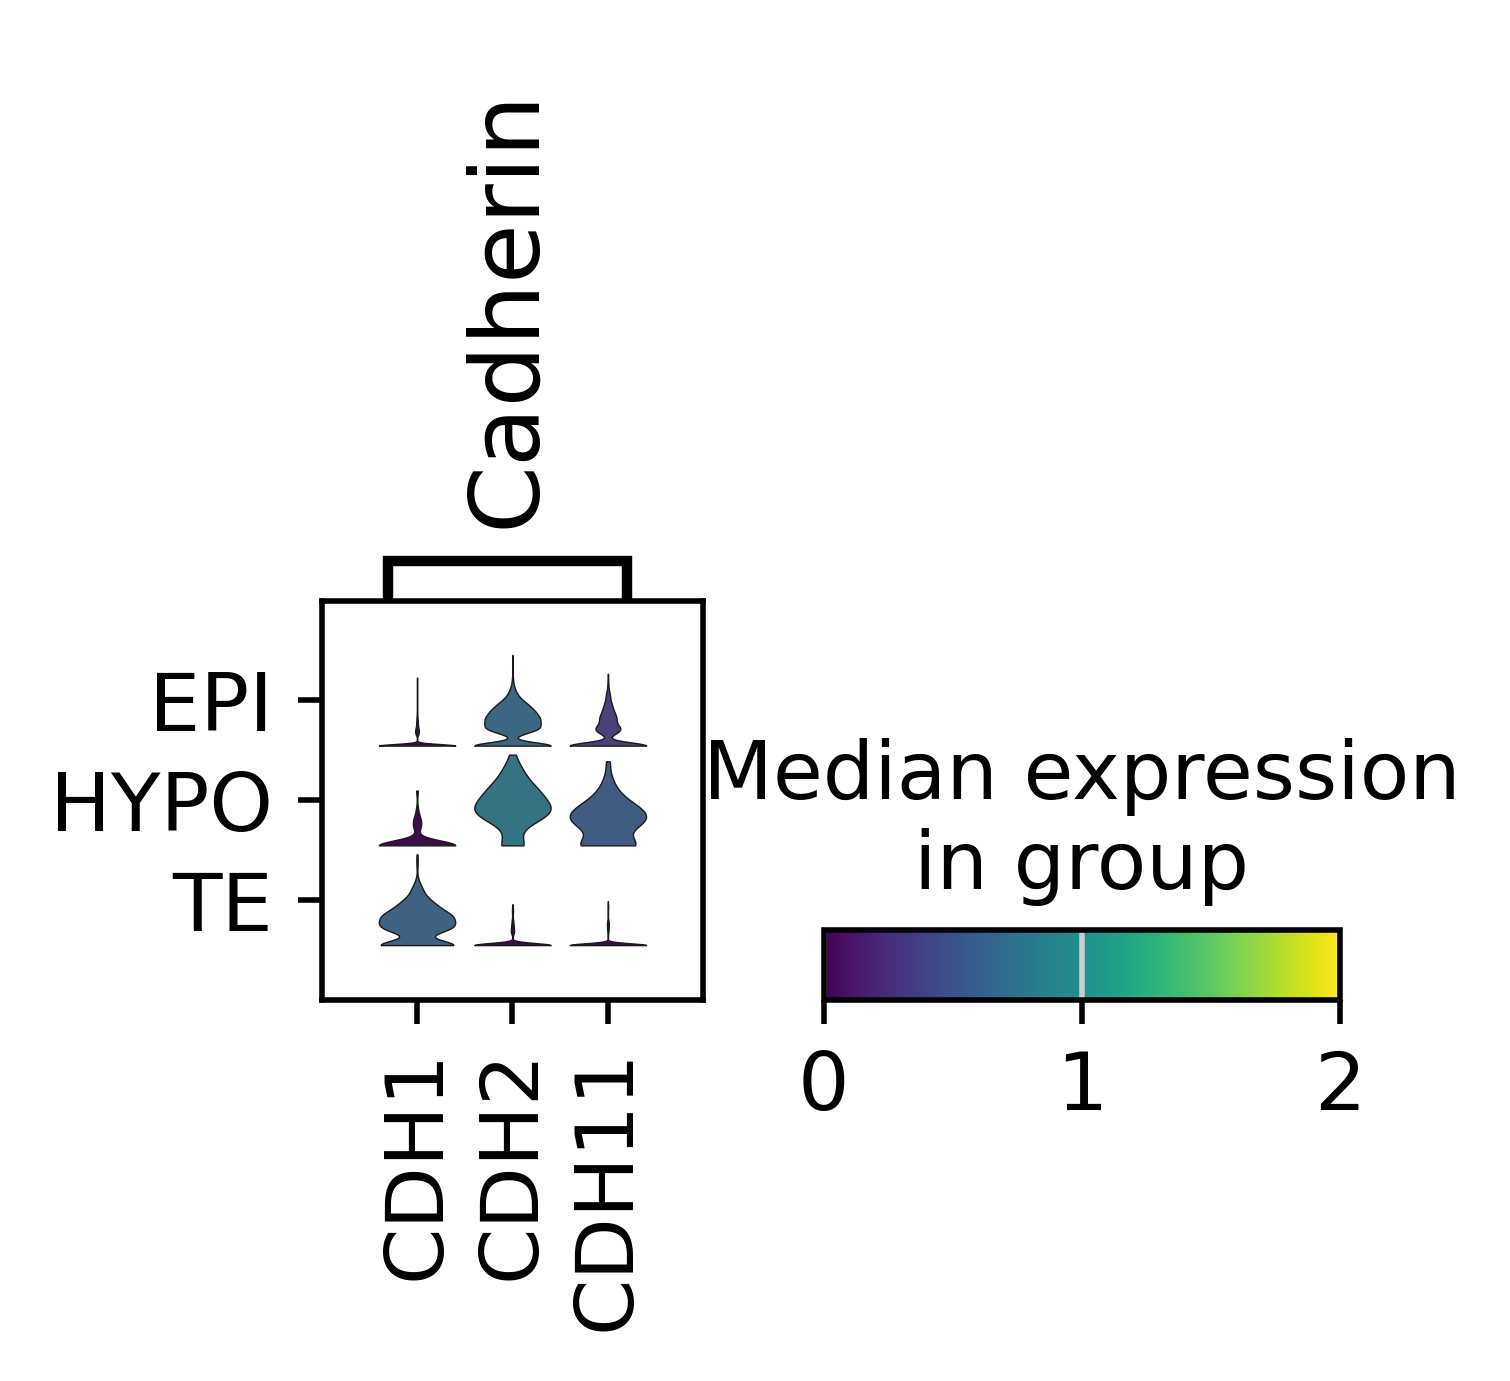

In [30]:
sc.pl.stacked_violin(adata, Caherin, groupby="Lines2", swap_axes=False, dendrogram=False, cmap='viridis', vmin=0, vmax=2, show=False)
plt.savefig('Figures/2H_Cadherin.pdf', bbox_inches="tight")

In [31]:
Signalling = {'FGF': [ 'FGF1', 'FGF2', 'FGFR1', 'FGFR2', 'MAPK1', 'MAPK3', 'MAPK14'],
             'TGFB': ['TGFB1', 'TGFB2','TGFBR1', 'SMAD2', 'SMAD3'],
             'BMP': ['BMP4','BMPR1A','BMPR1B','NOG','SMAD4','SMAD1'],
             'Activin':['INHBA', 'INHA','ACVR1B', 'ACVR1'], 
              'Anti Activin':['FST', 'FSTL1'], 
              'HIPPO': ['YAP1', 'TEAD2'],
             'WNT': ['RSPO3', 'CTNNB1', 'NLK', 'LRP6', 'GSK3A', 'GSK3B'], 
            'STAT': ['LIFR', 'LIF', 'IL6ST', 'IL6', 'STAT3'],
          'IGF': ['IGF1R', 'IGF2', 'IGFBP1','IGFBP2'],
             'EGF': ['EGFR']}

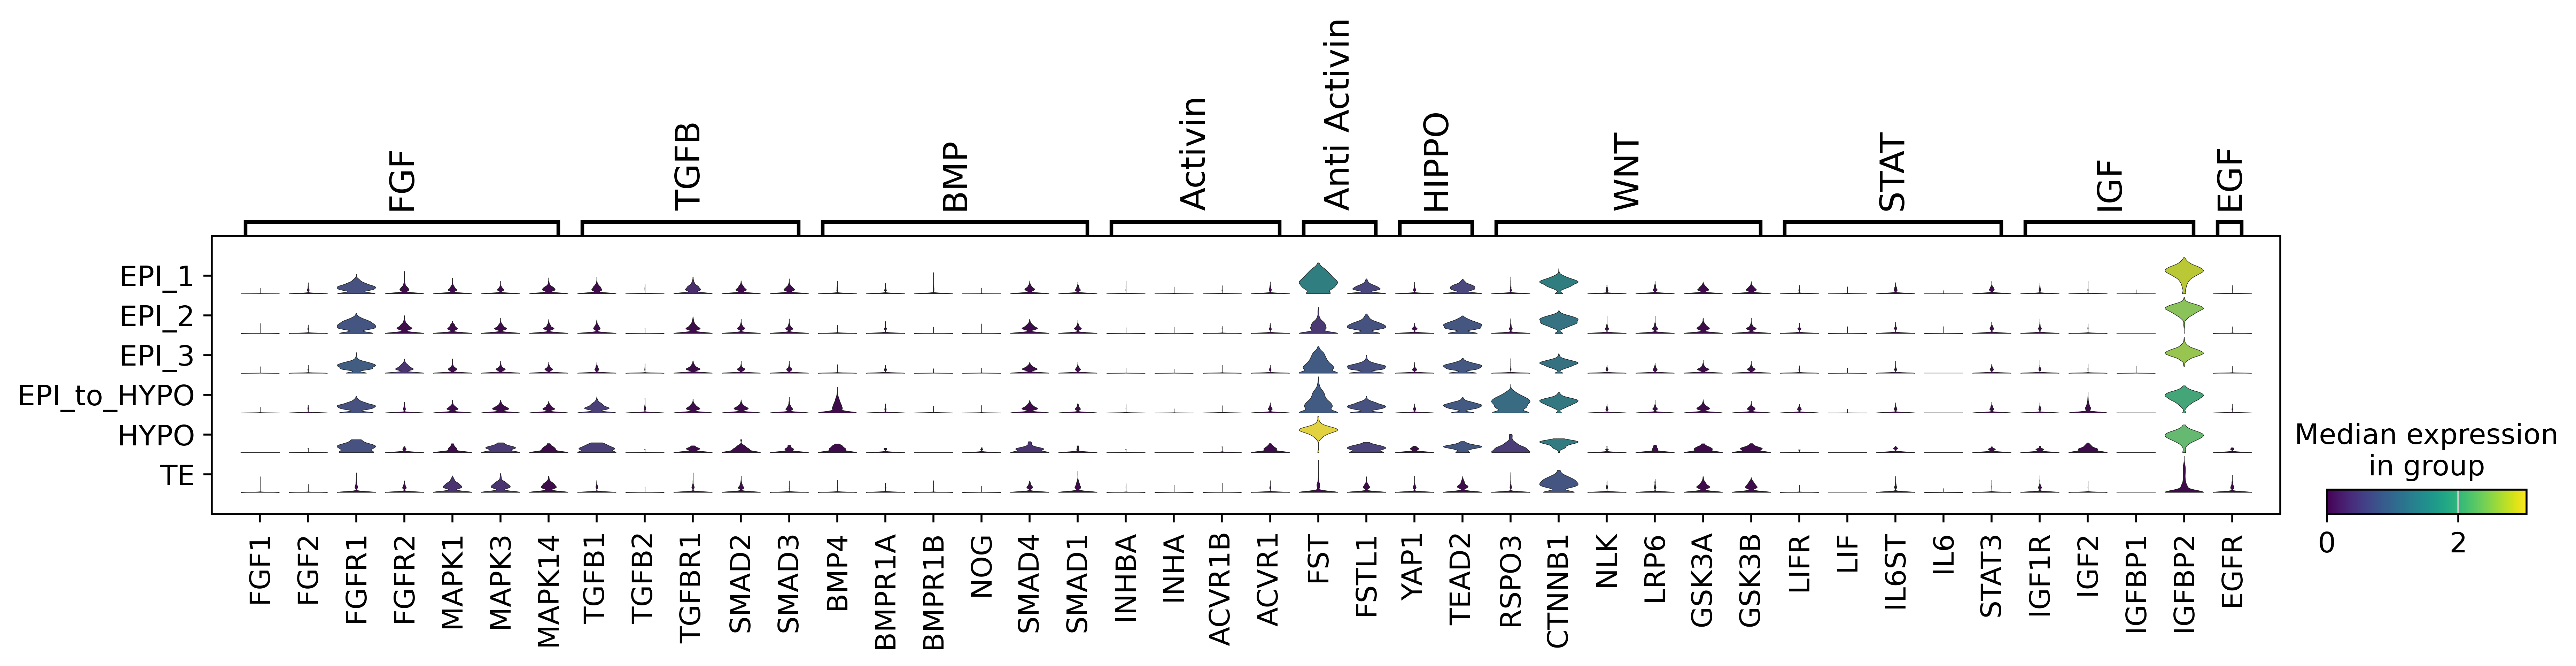

In [32]:
sc.pl.stacked_violin(adata, Signalling, groupby=['Lines'], dendrogram=False, cmap='viridis', show=False)
plt.savefig('Figures/2P_10x.pdf', bbox_inches="tight")

In [33]:
Pluripotency = {
    'Core': ['NANOG', 'POU5F1','MYC'],
    'Naive': [ 'PRDM1', 'KLF4', 'KLF5', 'TFCP2L1', 'DNMT3A'],
    'Primed': ['LIN28A', 'SALL4', 'OTX2', 'GATA6', 'GATA3', 'GATA4', 'CD74']}

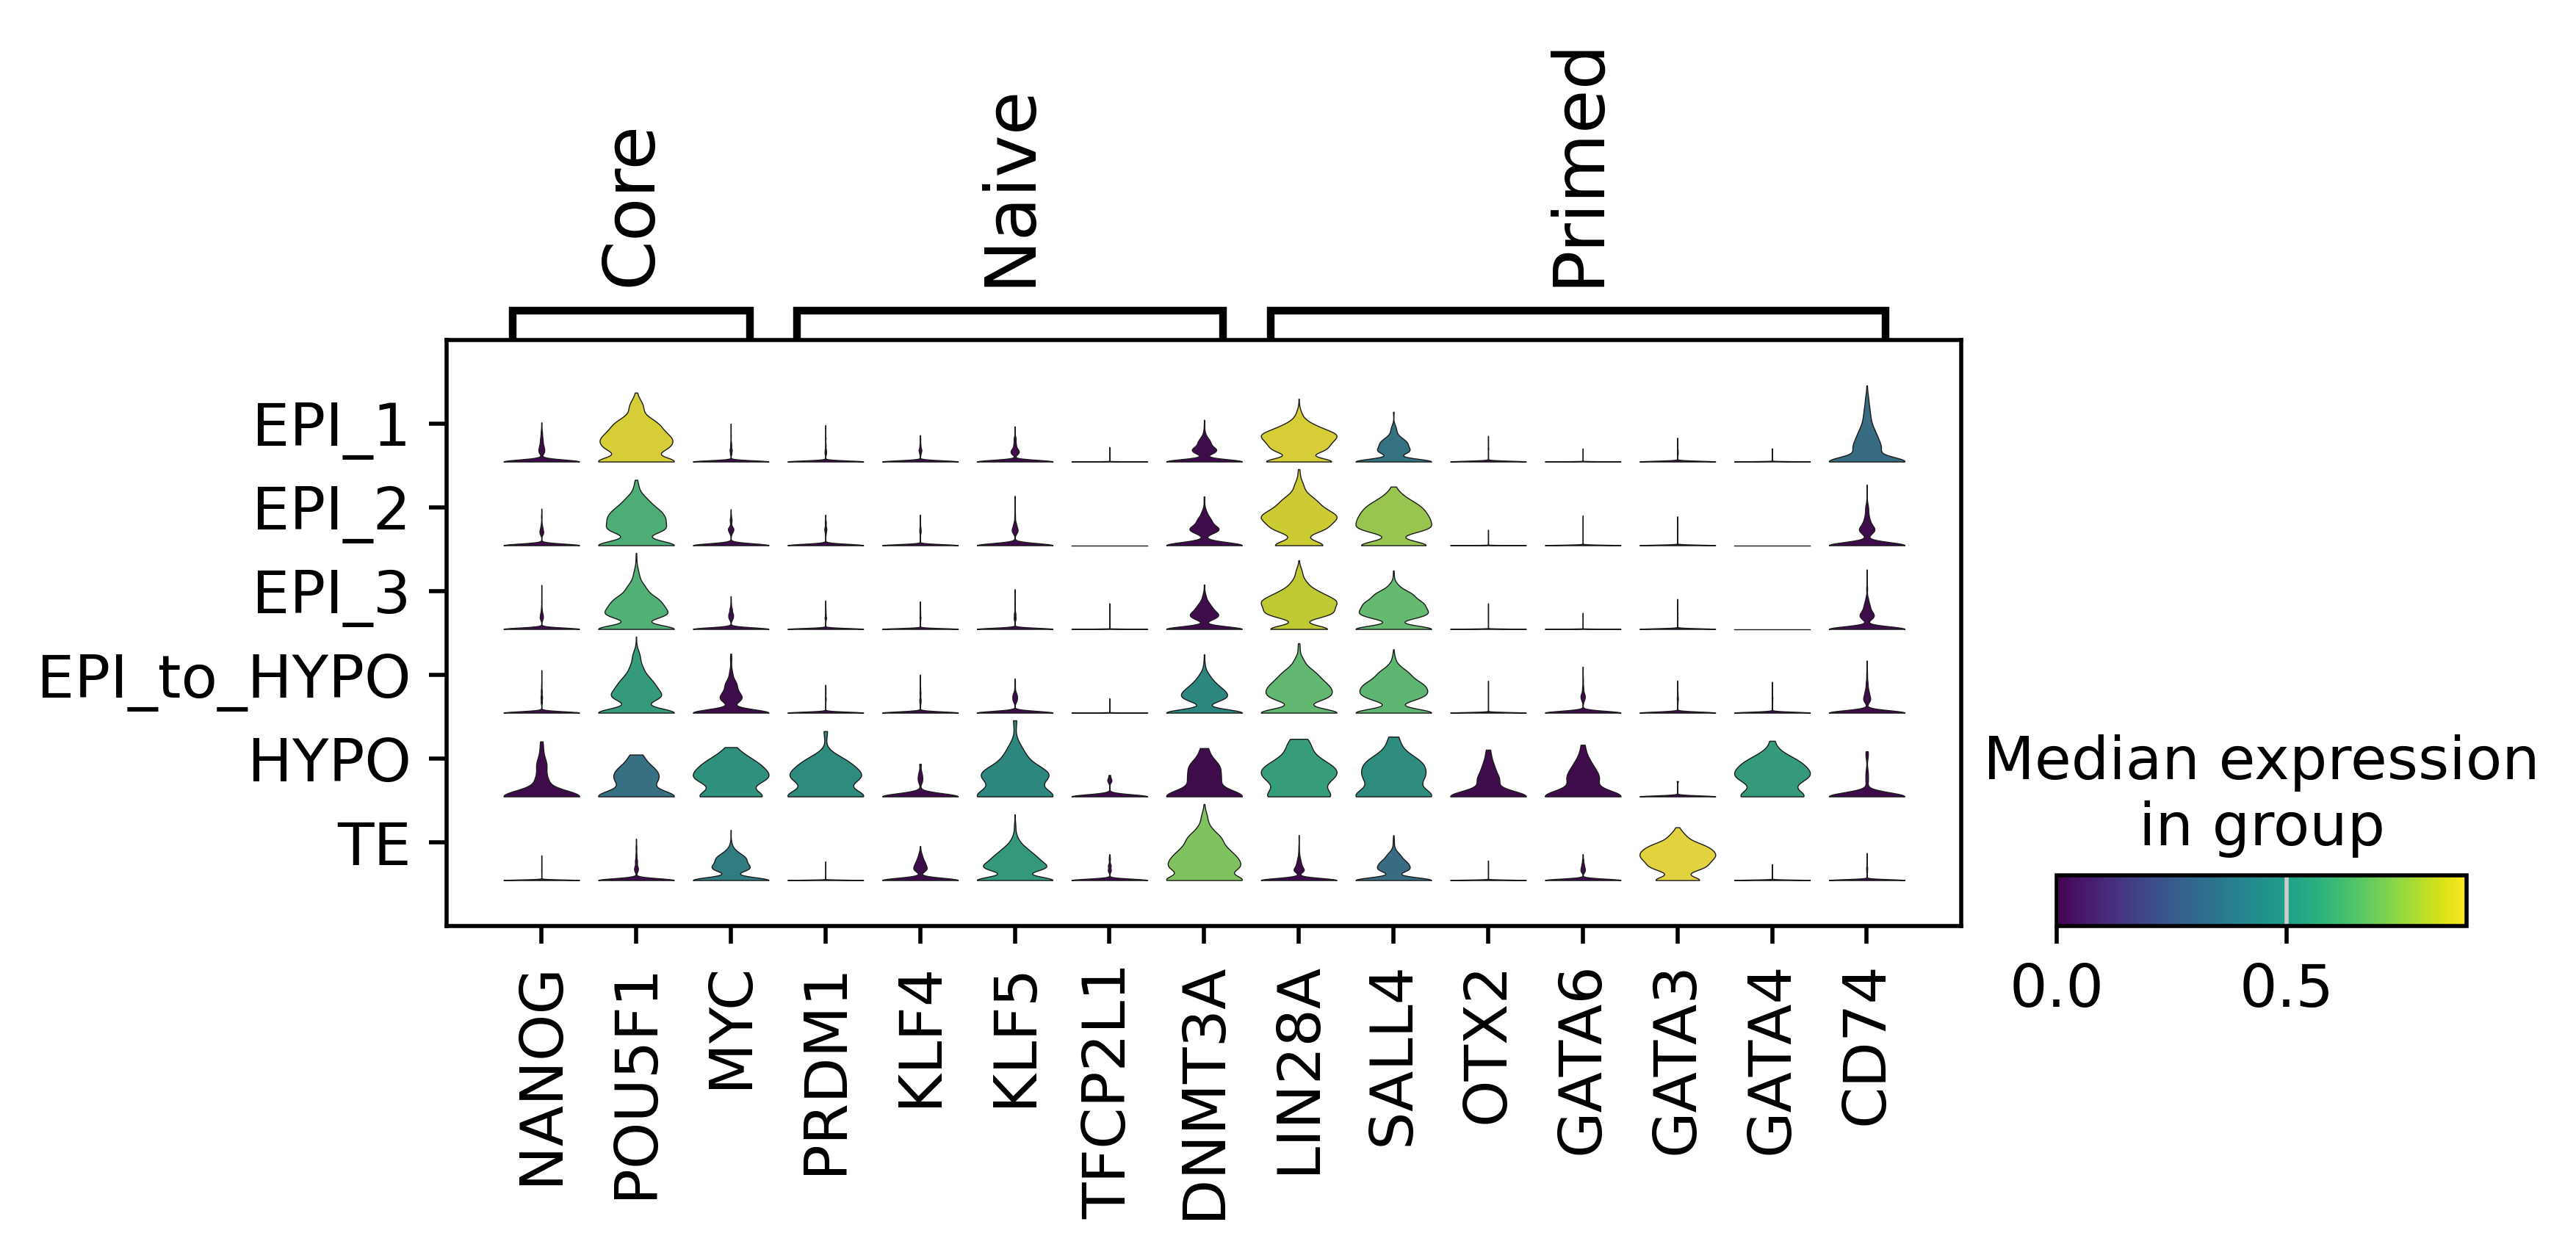

In [34]:
sc.pl.stacked_violin(adata, Pluripotency, groupby=['Lines'], dendrogram=False, cmap='viridis', show=False)
plt.savefig('Figures/S2O_10x.pdf', bbox_inches="tight")

# TE

In [35]:
adatate = adata[adata.obs.Lines=='TE'].copy()
adatate

AnnData object with n_obs × n_vars = 552 × 16206
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Lines', 'Lines2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'dendrogram_leiden', 'Lines_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
adatat = adatate.raw.to_adata()
adatat.raw = adatat
adatat.obs = adatate.obs.copy()

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


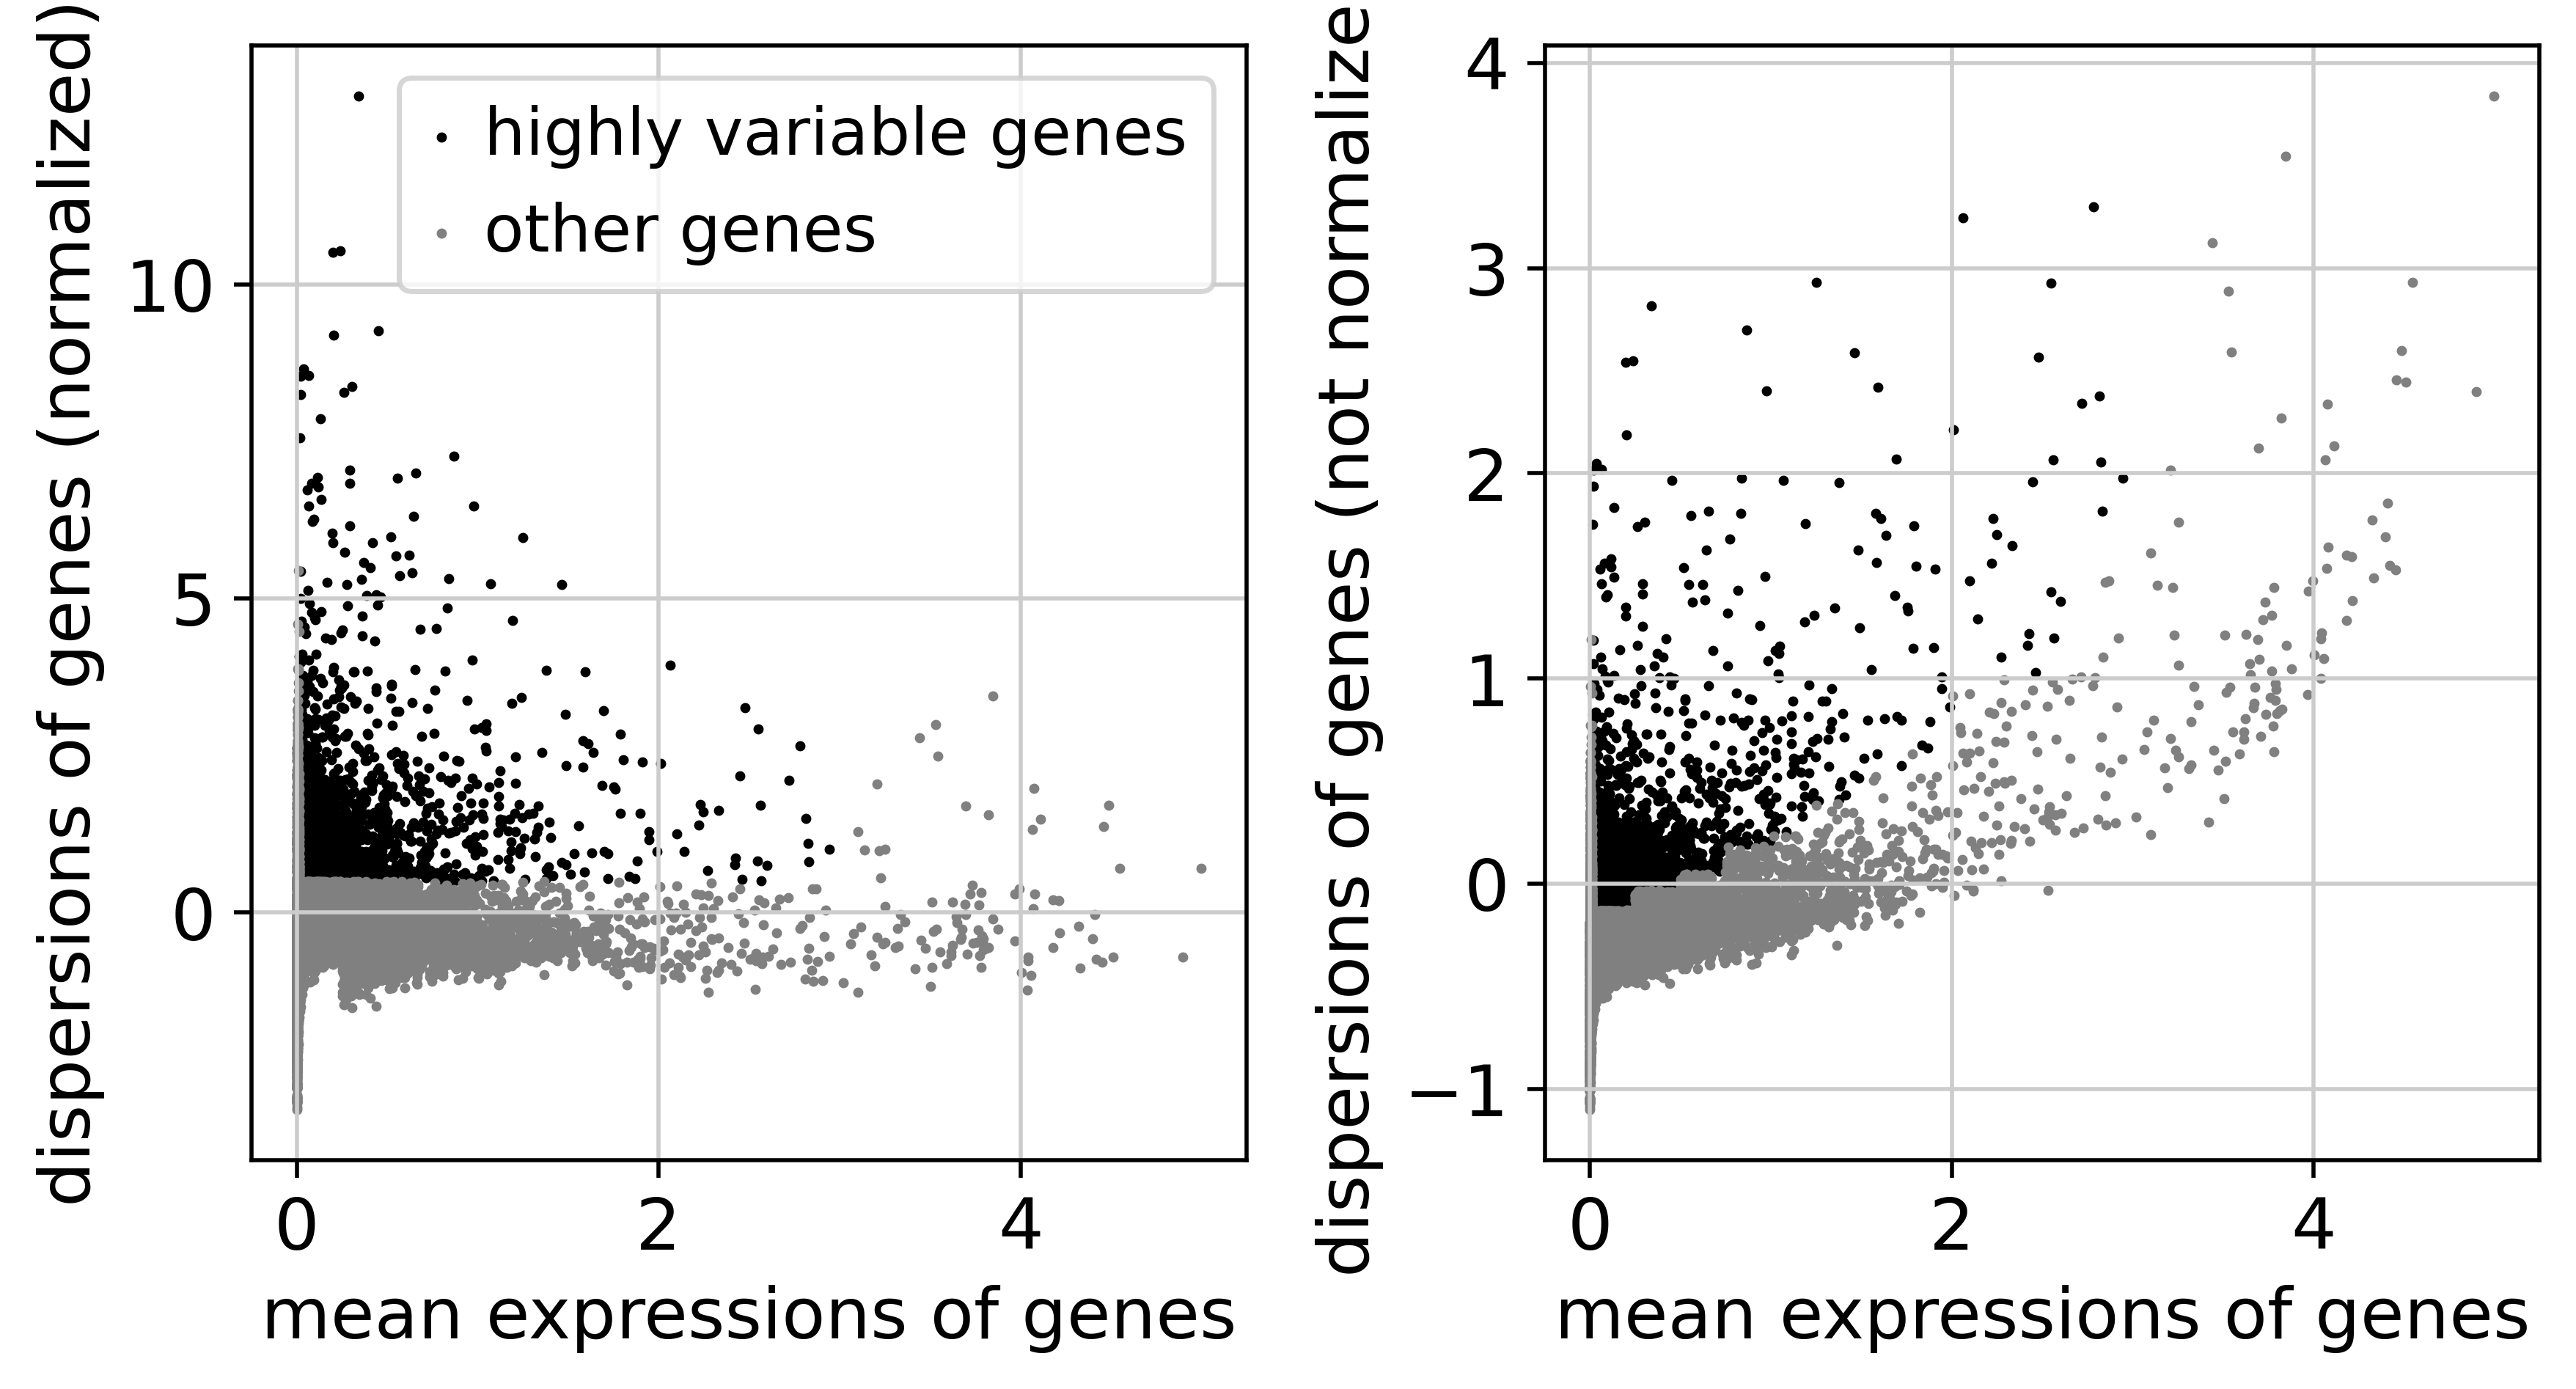

In [37]:
sc.pp.highly_variable_genes(adatat, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adatat)

In [38]:
sc.pp.scale(adatat, max_value=10)

In [39]:
sc.tl.pca(adatat, svd_solver='arpack', use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


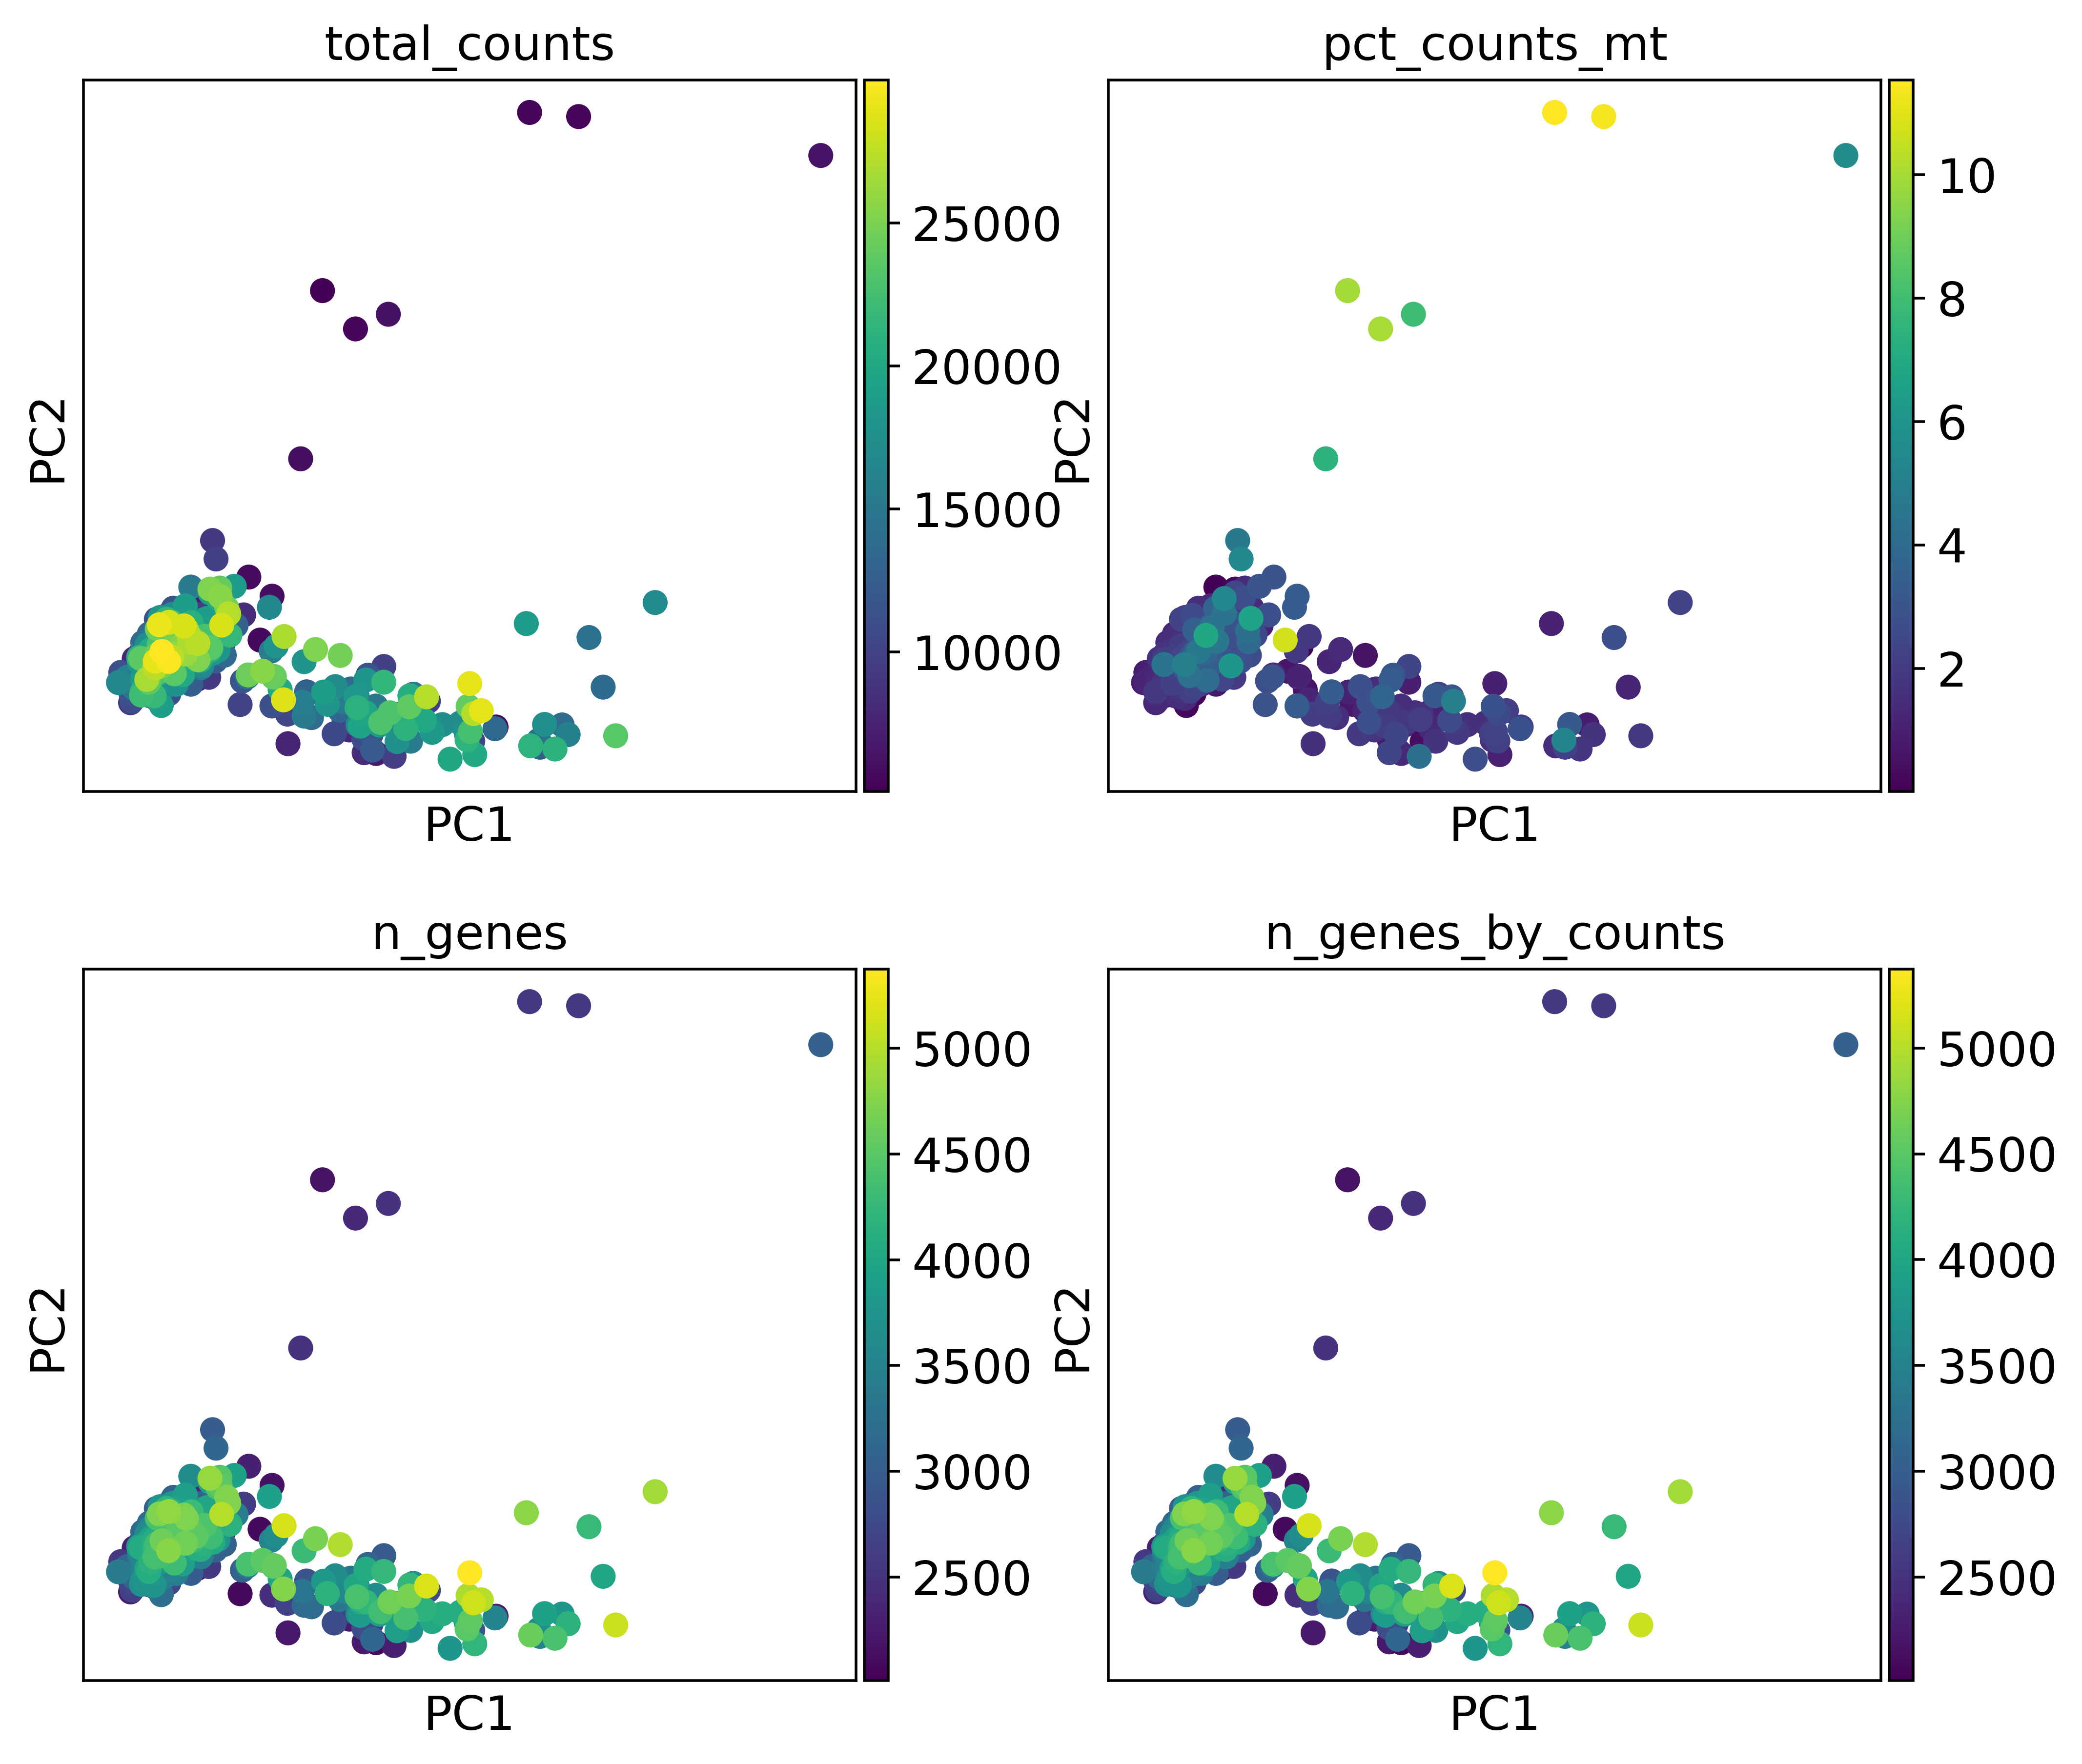

In [40]:
sc.pl.pca(adatat, color=["total_counts", "pct_counts_mt", "n_genes", "n_genes_by_counts"], ncols=2)

In [41]:
sc.pp.neighbors(adatat)
sc.tl.umap(adatat, min_dist=0.3)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [42]:
sc.tl.leiden(adatat, resolution=0.75)

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/usr/local/lib/python3.9/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


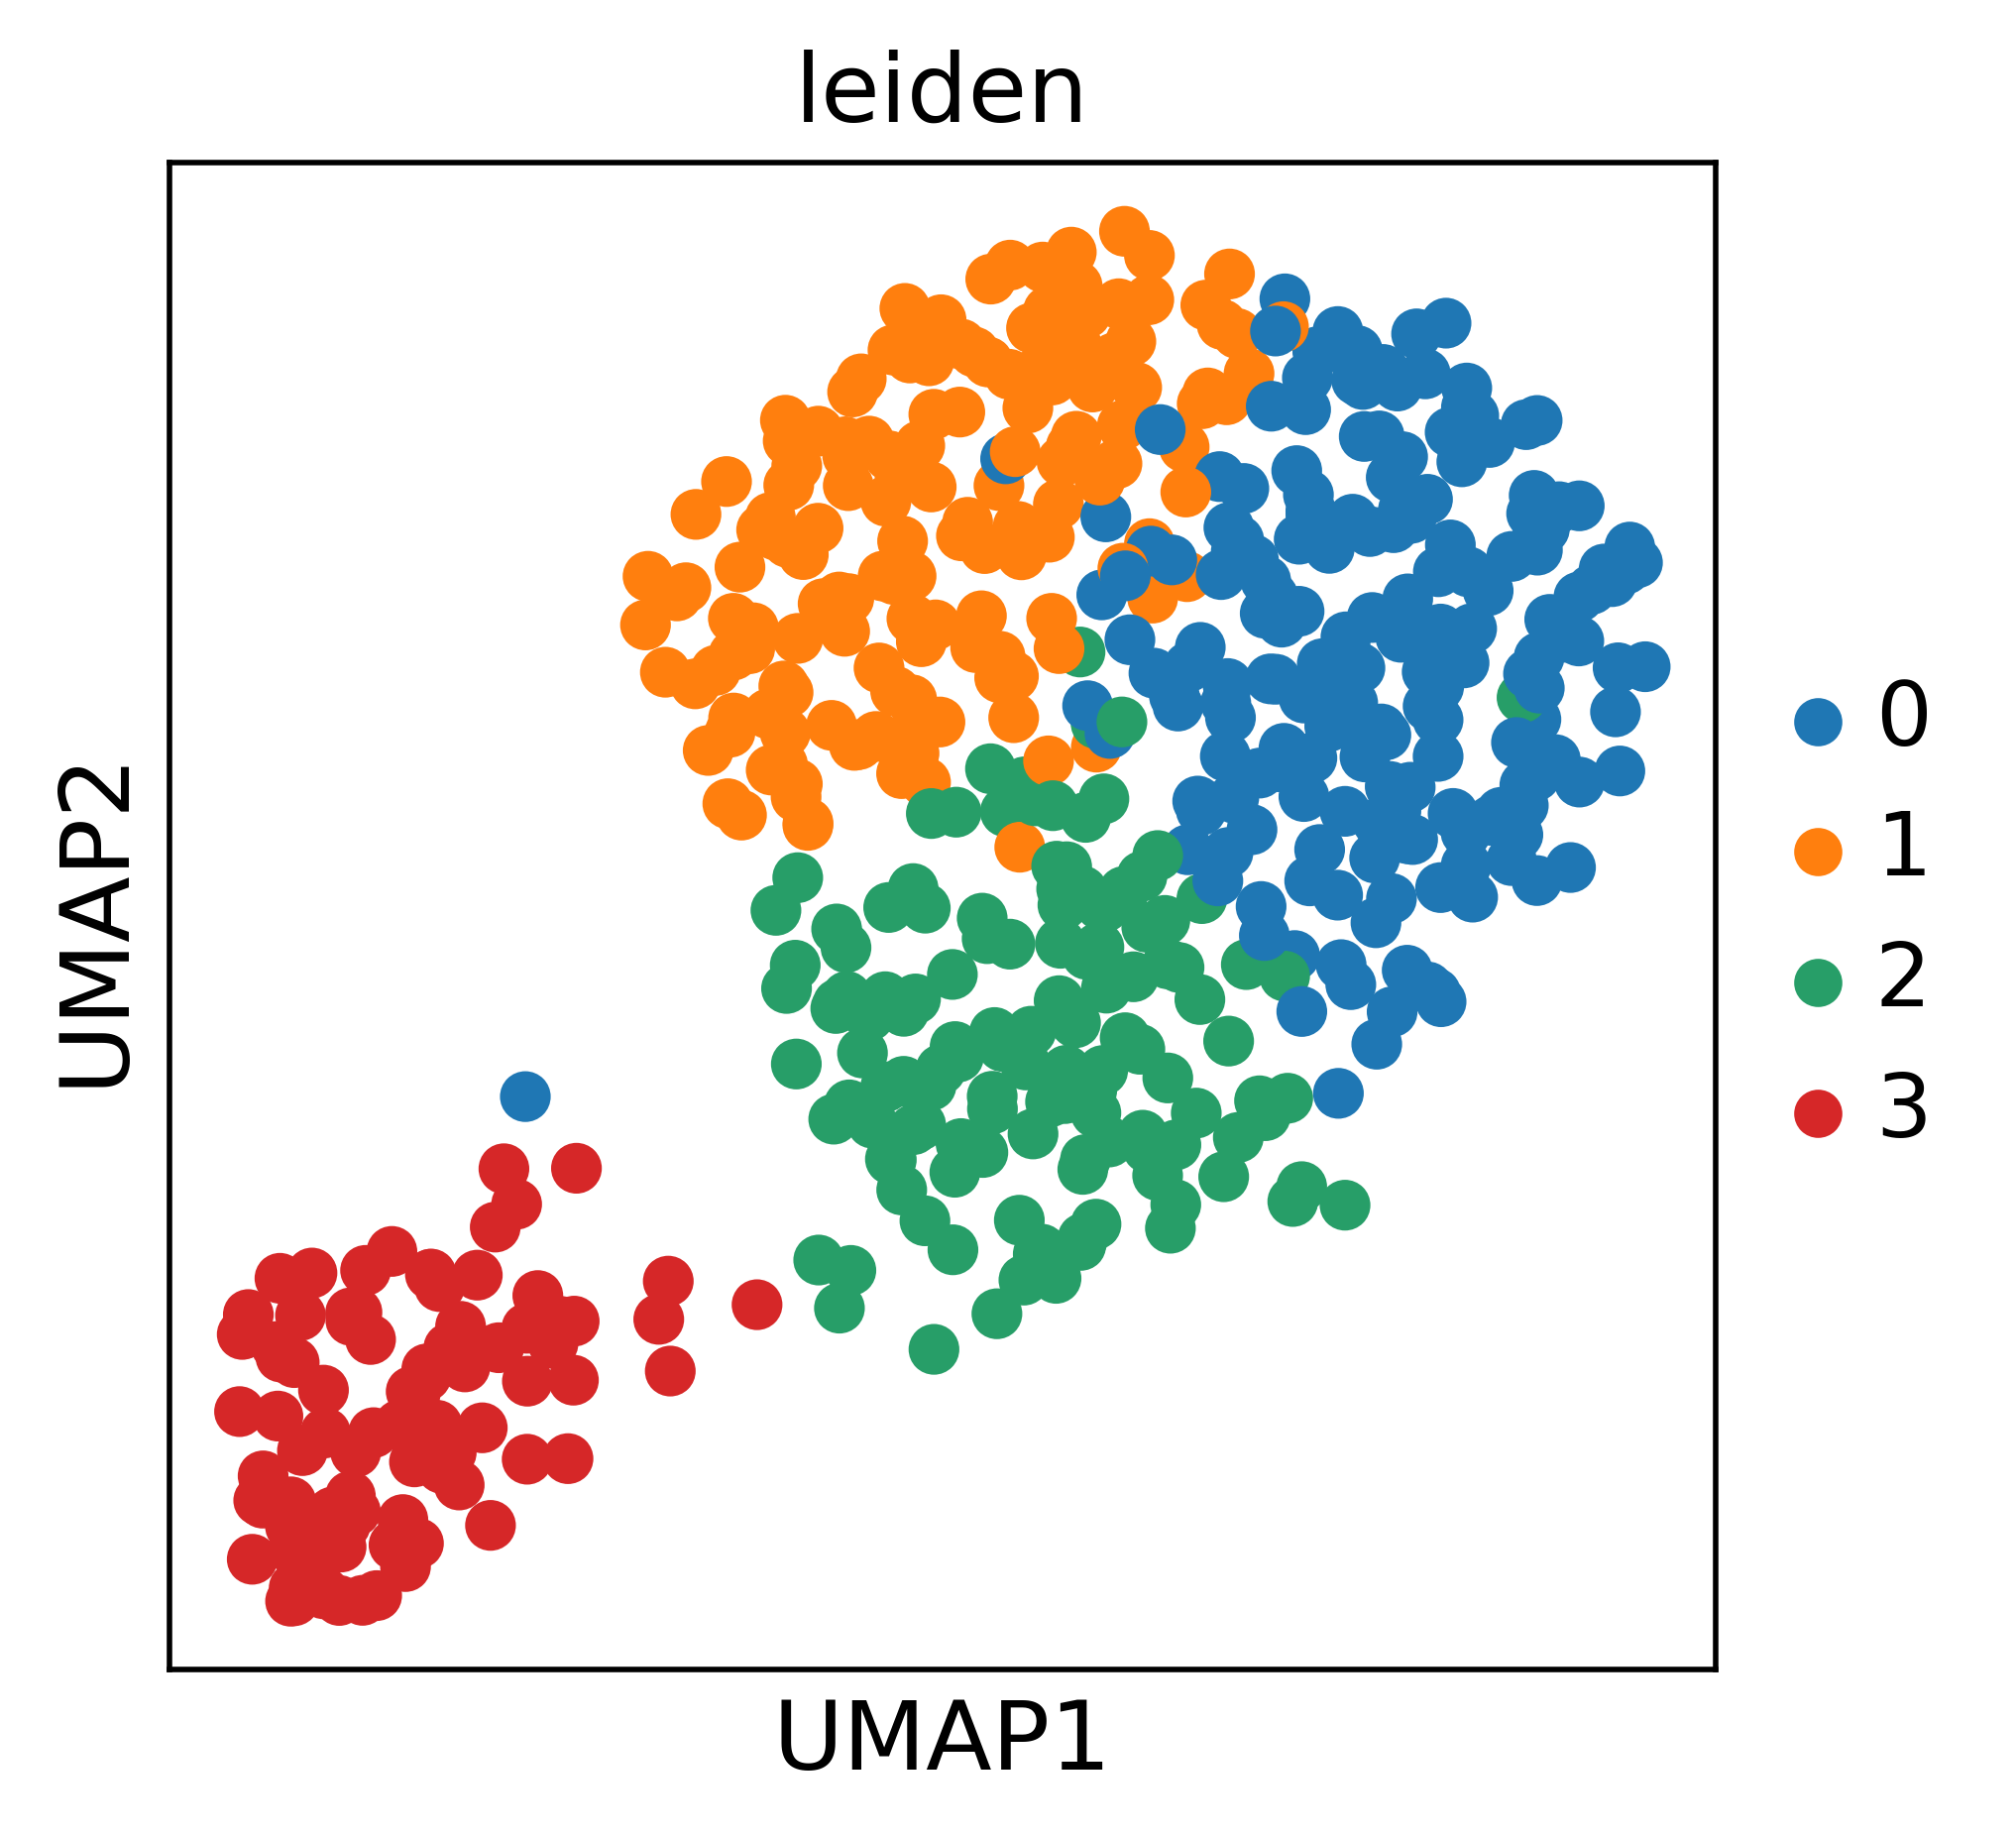

In [43]:
sc.pl.umap(adatat, color='leiden', show=False)
plt.savefig('Figures/2SQ_leiden.pdf', bbox_inches="tight")

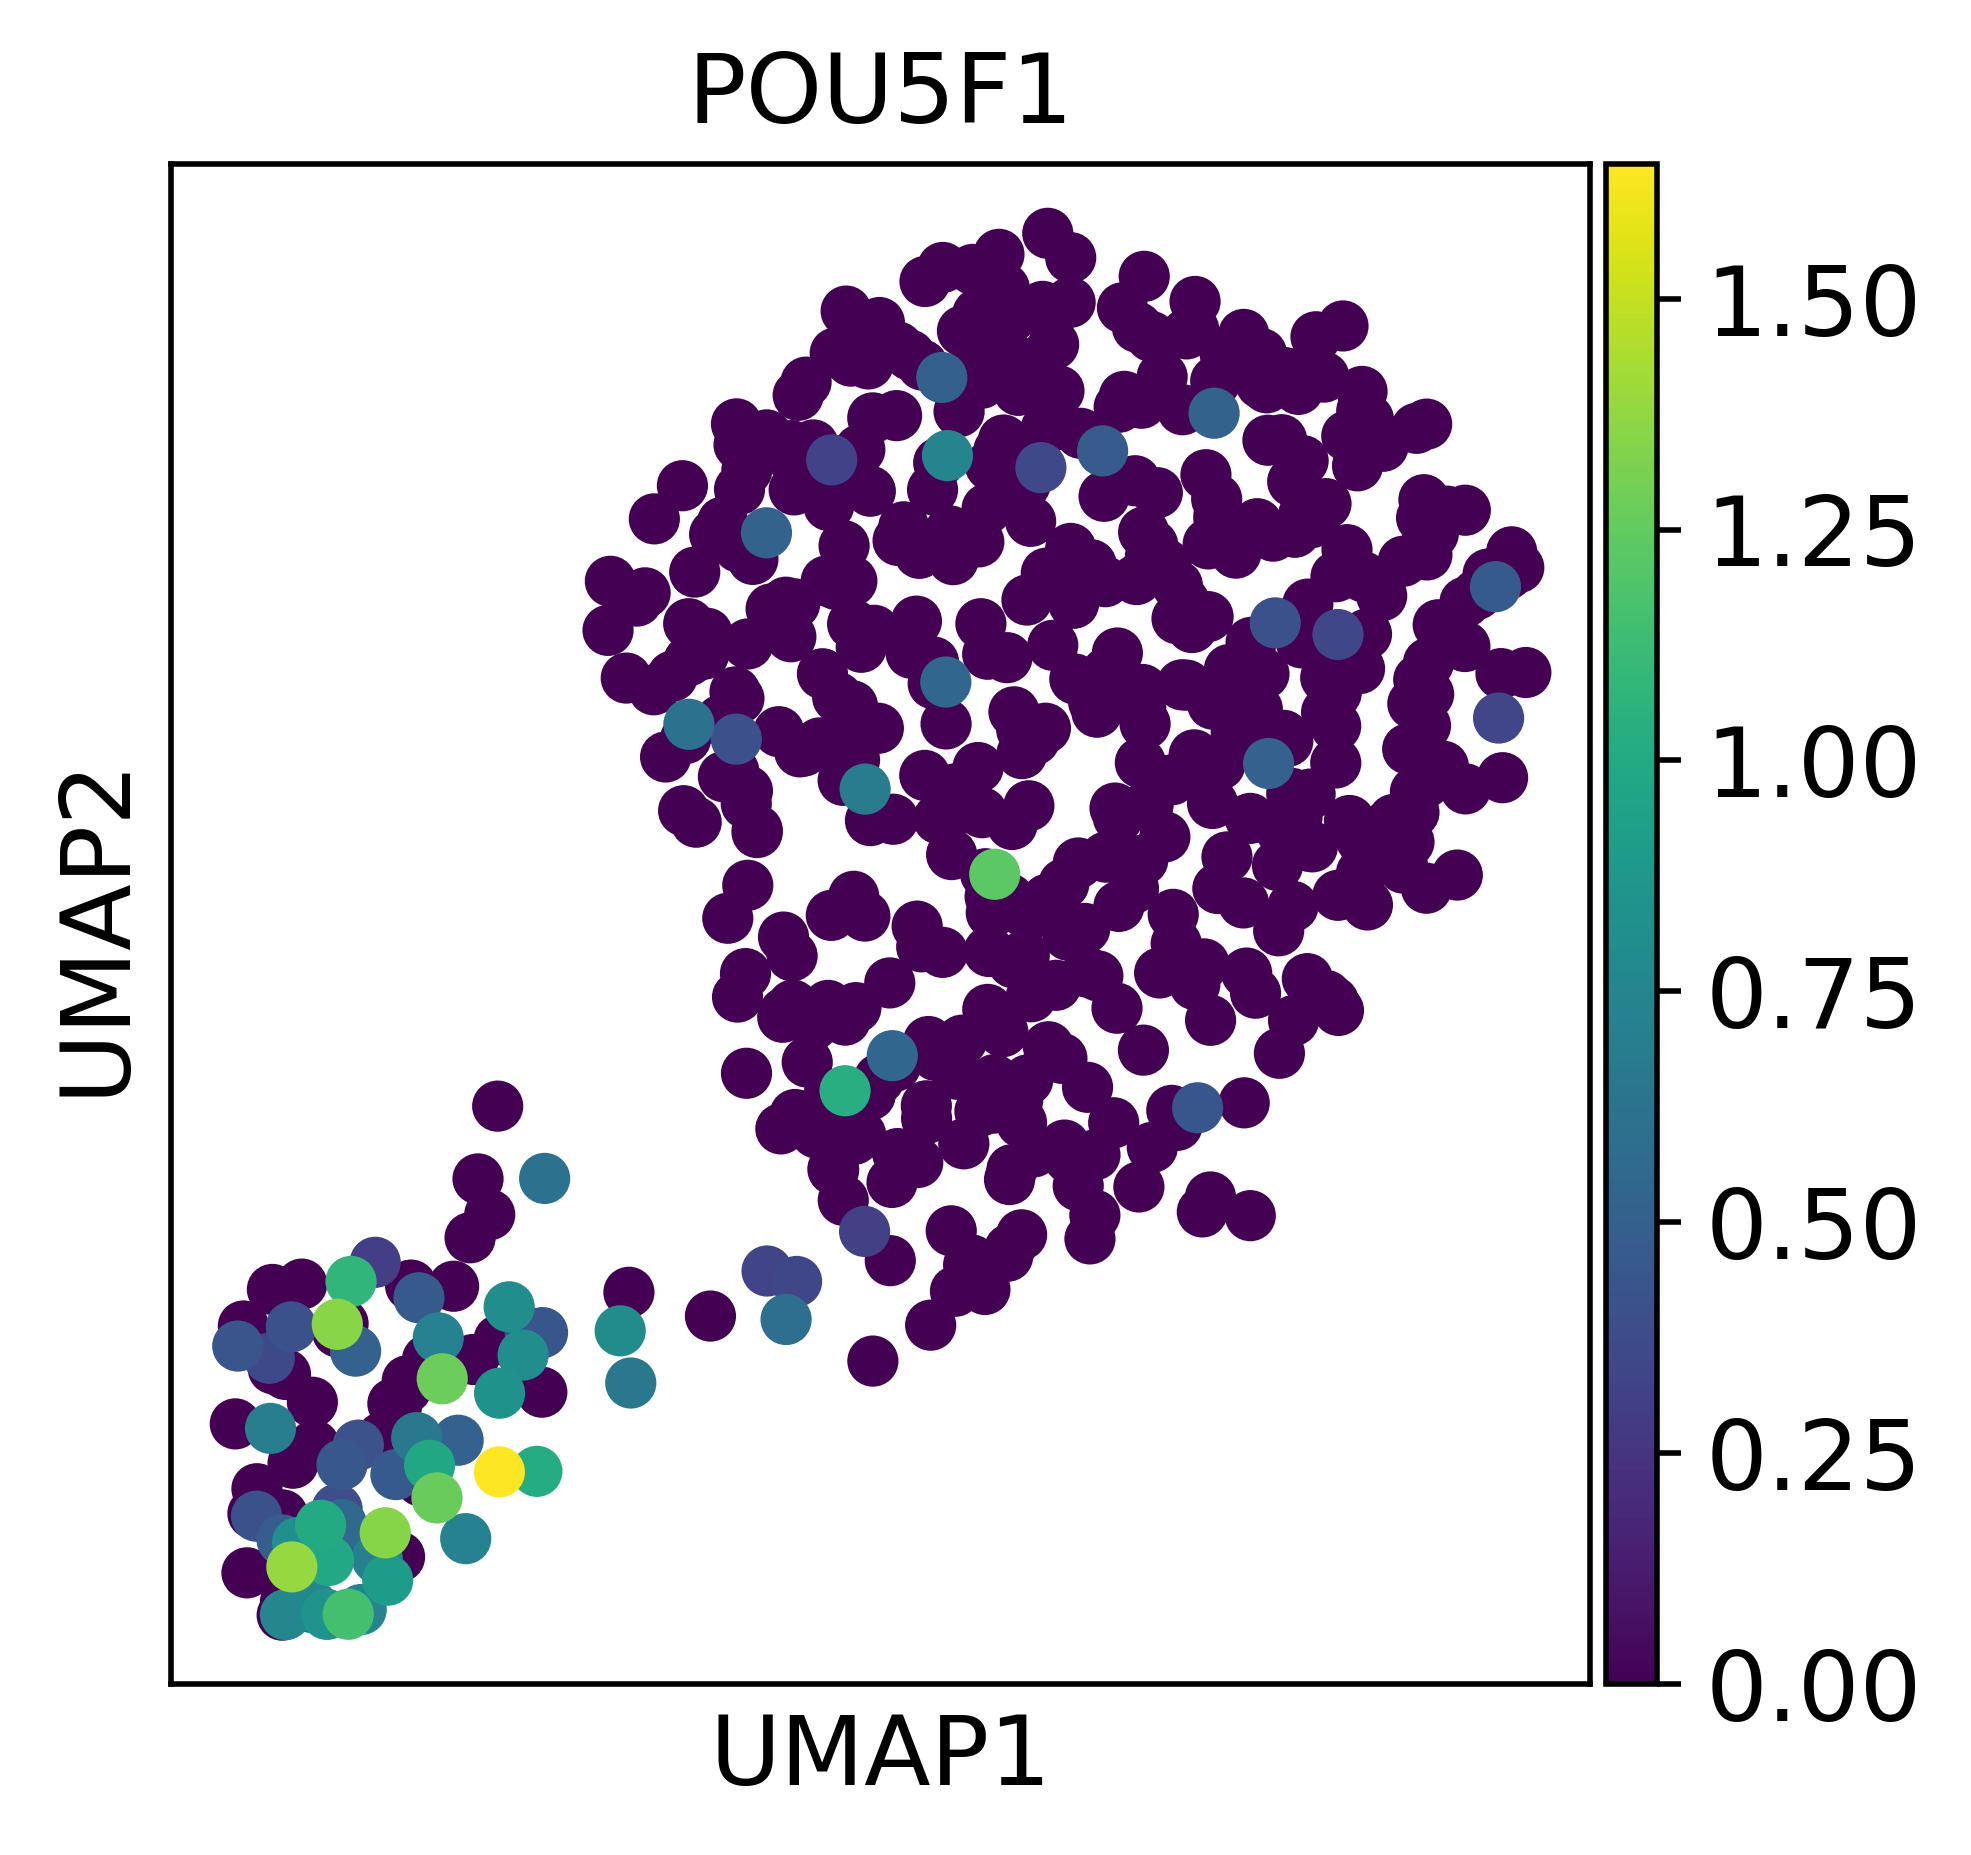

In [44]:
sc.pl.umap(adatat, color='POU5F1', show=False)
plt.savefig('Figures/2SQ_POU5F1.pdf', bbox_inches="tight")

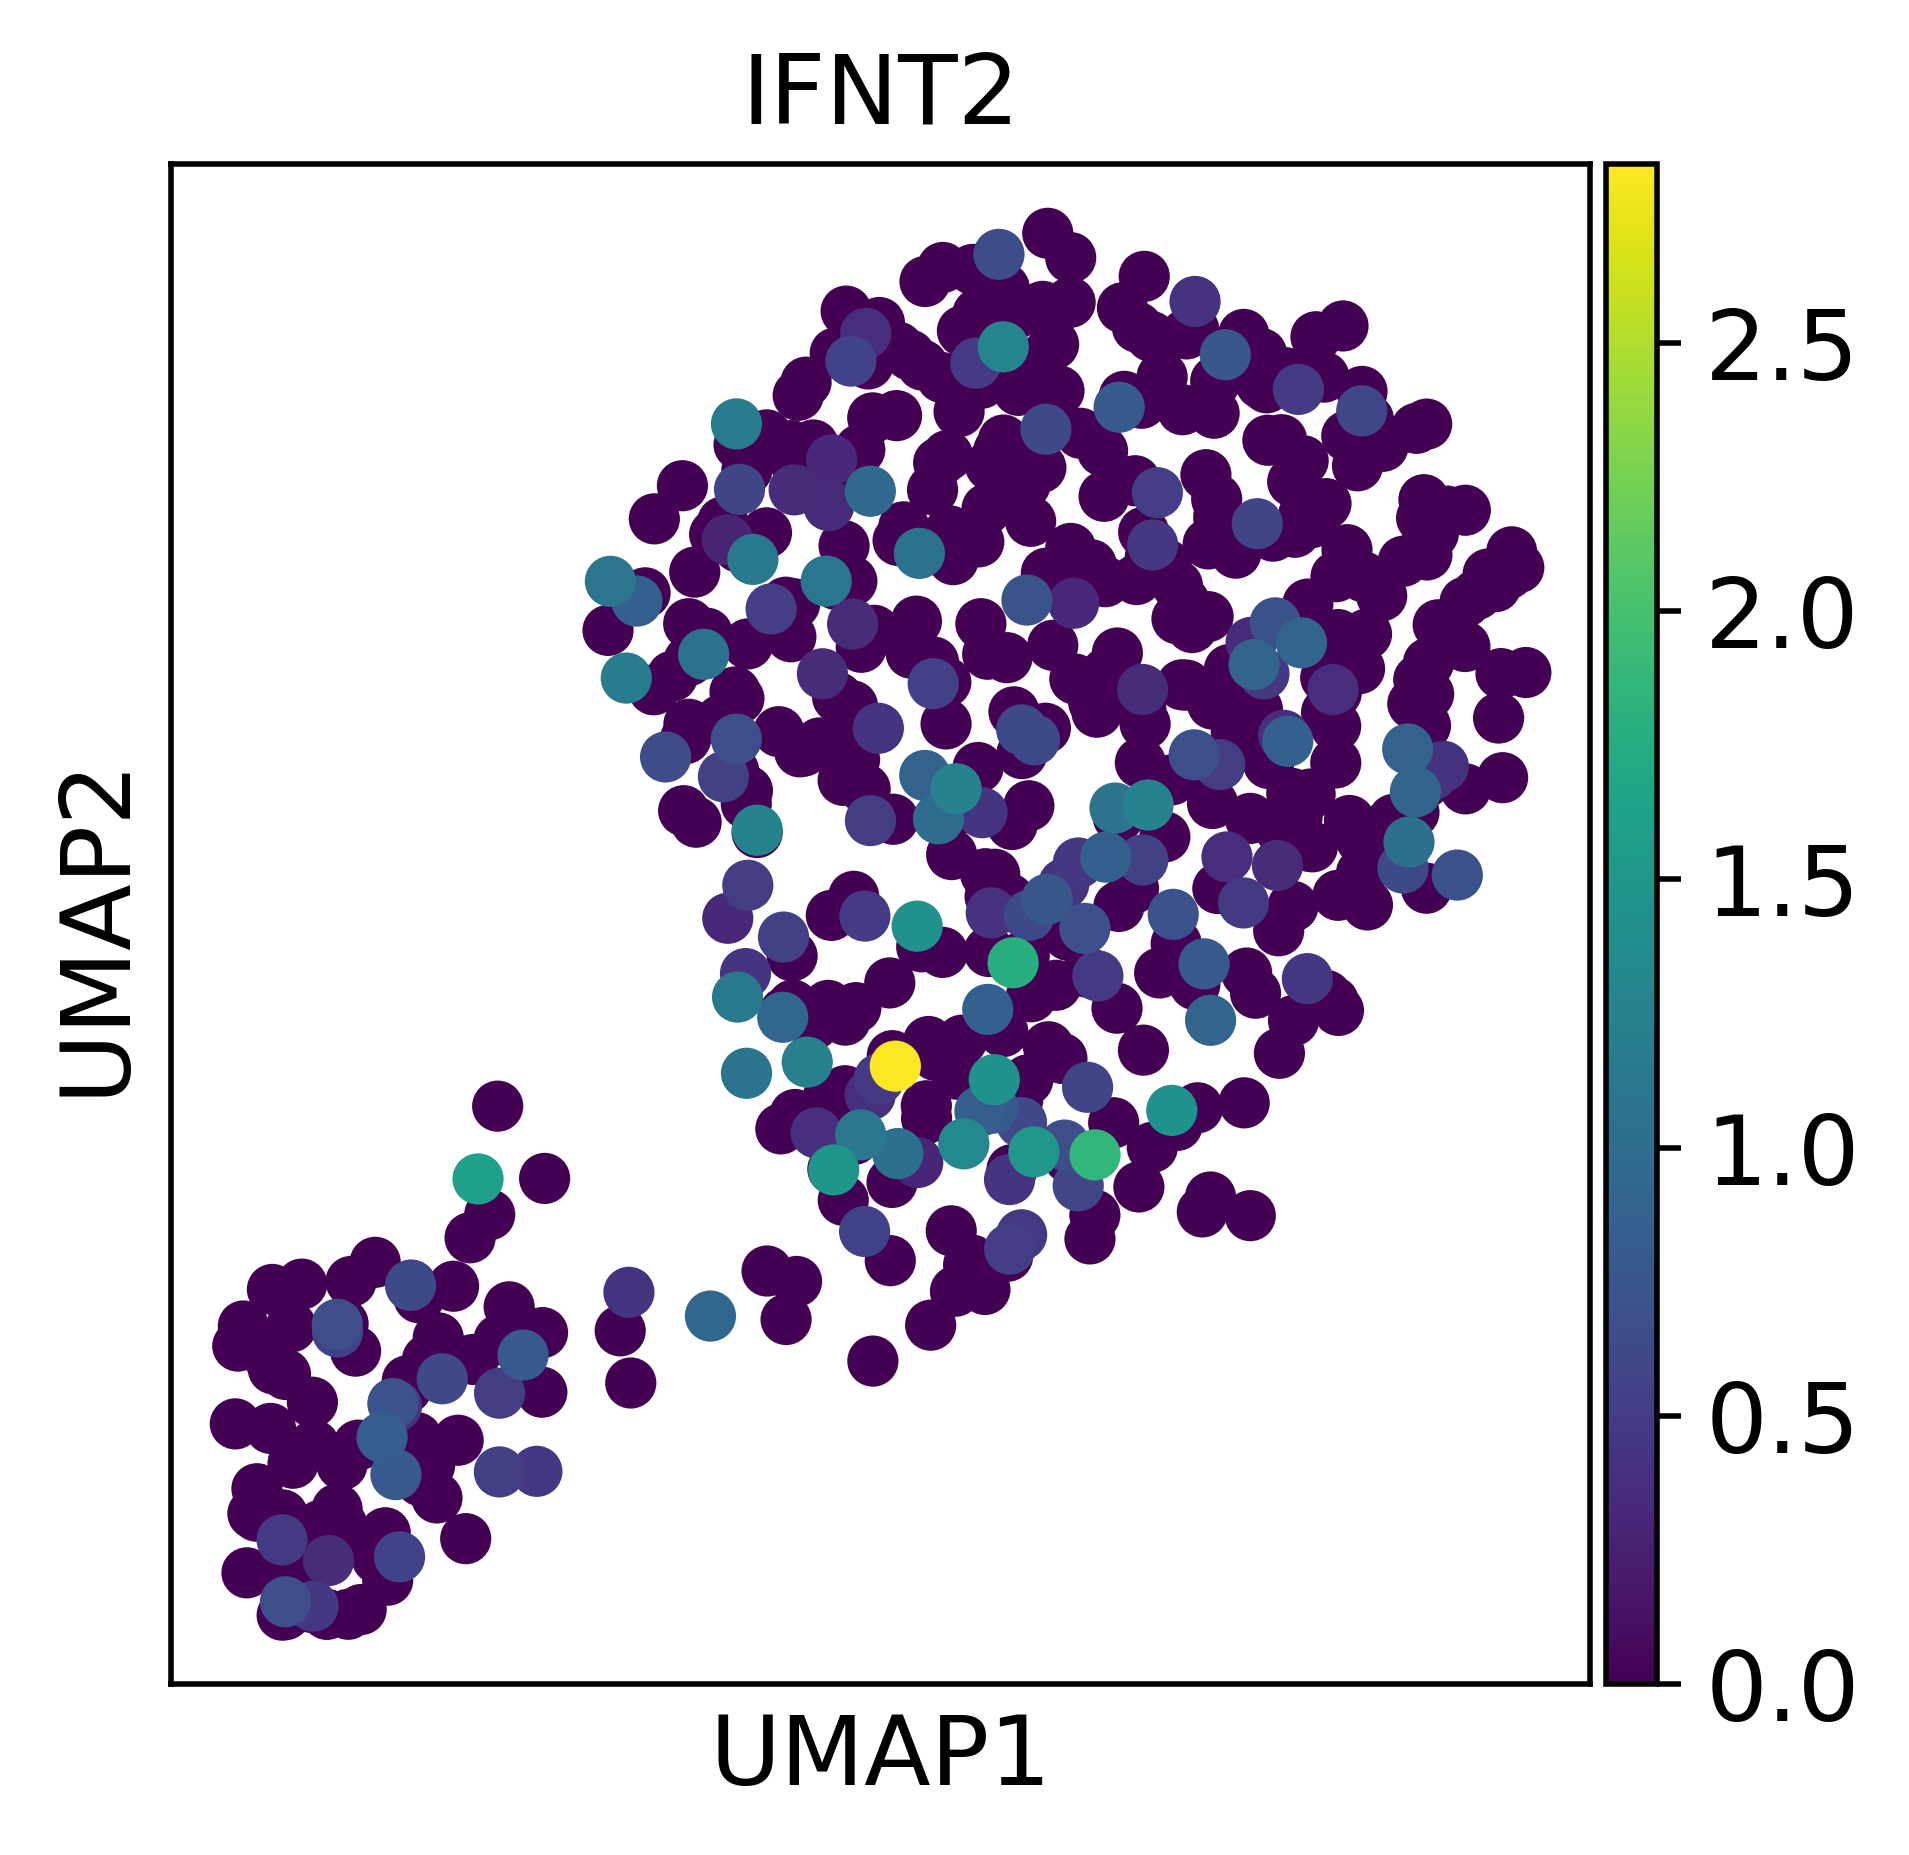

In [45]:
sc.pl.umap(adatat, color='IFNT2', show=False)
plt.savefig('Figures/2SQ_IFNT2.pdf', bbox_inches="tight")